# EDA

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [1]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Imports for the project
import pandas as pd
import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")


import os                           
import math
import seaborn as sns
from collections import Counter
from sklearn.decomposition import PCA

from __future__ import division
from scipy.stats import skew
from scipy.stats.stats import pearsonr

from random import random
from mpl_toolkits.mplot3d import Axes3D



**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Load the CSV into a DataFrame

In [3]:
df = pd.read_csv(r'clean_data.csv')

A copy of the data for backup

In [4]:
clean_df = df.iloc[:,1:].copy()

In [5]:
clean_df.nunique()

Game            12894
Pos              6017
Genre              18
Console            47
Publisher        1078
Developer        3297
NA_Sales          286
PAL_Sales         227
Japan_Sales       105
Other_Sales       121
Total_Sales       812
Relese_Month       12
Relese_Year        43
Hit_Games           2
dtype: int64

In [6]:
df.describe().transpose()

count          mean           std     min      25%       50%  \
Unnamed: 0    17487.0  8.753928e+03  5.053998e+03     0.0   4378.5    8752.0   
Pos           17487.0  2.107136e+03  1.972811e+03     1.0    387.0    1561.0   
NA_Sales      17487.0  1.388740e+05  3.781996e+05     0.0      0.0   10000.0   
PAL_Sales     17487.0  7.948705e+04  2.968746e+05     0.0      0.0       0.0   
Japan_Sales   17487.0  2.712301e+04  9.498465e+04     0.0      0.0       0.0   
Other_Sales   17487.0  2.692286e+04  1.007986e+05     0.0      0.0       0.0   
Total_Sales   17487.0  1.302763e+06  9.792054e+06     0.0  50000.0  170000.0   
Relese_Month  17487.0  7.099159e+00  3.477465e+00     1.0      4.0       8.0   
Relese_Year   17487.0  2.008093e+03  6.875727e+00  1980.0   2004.0    2009.0   
Hit_Games     17487.0  1.736147e-01  3.787886e-01     0.0      0.0       0.0   

                   75%          max  
Unnamed: 0     13130.5      17509.0  
Pos             3299.0       9181.0  
NA_Sales      130000.0    9760000.0  
PAL_Sales      40000.0    9850000.0  
Japan_Sales    10000.0    2130000.0  
Other_Sales    20000.0    3120000.0  
Total_Sales   550000.0  496400000.0  
Relese_Month      10.0         12.0  
Relese_Year     2013.0       2022.0  
Hit_Games          0.0          1.0

In [7]:
clean_df

Game  Pos         Genre  \
0                                           God of War    1        Action   
1                                             Warriors    2        Action   
2                                        Devil May Cry    3        Action   
3                                     Dynasty Warriors    4        Action   
4                                              Frogger    5        Action   
...                                                ...  ...           ...   
17482  Wand of Fortune 2 FD: Kimi ni Sasageru Epilogue  461  Visual+Novel   
17483              Infinite Stratos 2: Ignition Hearts  462  Visual+Novel   
17484                                  Shin Hayarigami  463  Visual+Novel   
17485                                      Root Letter  464  Visual+Novel   
17486                                      Amatsutsumi  468  Visual+Novel   

      Console                    Publisher                Developer  NA_Sales  \
0      Series  Sony Computer Entertainment  SIE Santa Monica Studio         0   
1      Series                         KOEI              Omega Force         0   
2      Series                       Capcom                   Capcom         0   
3      Series                         KOEI              Omega Force         0   
4      Series                       Konami                   Konami         0   
...       ...                          ...                      ...       ...   
17482     PSP                 Idea Factory             Idea Factory         0   
17483     PSV                          5pb               5pb. Games         0   
17484     PS3         Nippon Ichi Software     Nippon Ichi Software         0   
17485     PS4                        PQube           Kadokawa Games         0   
17486     PSV                    Prototype                Prototype         0   

       PAL_Sales  Japan_Sales  Other_Sales  Total_Sales  Relese_Month  \
0              0            0            0     51000000             3   
1              0            0            0     47820000             6   
2              0            0            0     25200000            10   
3              0            0            0     21150000             6   
4              0            0            0     20000000            10   
...          ...          ...          ...          ...           ...   
17482          0        30000            0        30000            11   
17483          0        30000            0        30000             2   
17484          0        40000            0        40000             8   
17485          0        30000            0        30000            11   
17486          0        10000            0        10000             5   

       Relese_Year  Hit_Games  
0             2005          1  
1             1997          1  
2             2001          1  
3             1997          1  
4             1981          1  
...            ...        ...  
17482         2012          0  
17483         2014          0  
17484         2014          0  
17485         2016          0  
17486         2018          0  

[17487 rows x 14 columns]

**The categorical columns are:**

Console
Genre
Publisher
Developer

**The numerical columns are:**


Relese_Year

Relese_Month

VGChartz_Score

Critic_Score

NA_Sales

PAL_Sales

Japan_Sales

Other_Sales

Total_Sales

Hit_Games

***----------------------------------------------------------------***

Game — The games name

Console — Platform of the games release (i.e. PC, PS4, etc.)

Genre — Genre of the game

Publisher — Publisher of the game

Developer — Developer of the game

Critic_Score - Critic's score

VGChartz_Score - VGChartz's Score

NA_Sales — Sales in North America (in millions)

PAL_Sales — Sales in Europe (in millions)

Japan_Sales — Sales in Japan (in millions)

Other_Sales — Sales in the rest of the world (in millions)

Total_Sales — Total worldwide sales

Hit_Games - hit game(1) or not(0)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Univariate Analysis

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Top 10 games who made the most sales globally

In [8]:
#Top 10 games with the highest sales volume

Game = clean_df.Game
Genre = clean_df.Genre
Total_Sales = clean_df.Total_Sales
Publisher =  clean_df.Publisher
Relese_Year=  clean_df.Relese_Year
Developer=  clean_df.Developer
Relese_Month=  clean_df.Relese_Month
Console= clean_df.Console
Hit_Games=clean_df.Hit_Games

dfSales = {'Game':Game,'Genre': Genre, 'Total_Sales': Total_Sales, 
'Publisher':Publisher,'Developer':Developer,'Relese_Month':Relese_Month,'Relese_Year':Relese_Year,'Console':Console,'Hit_Games':Hit_Games}
dfSales = pd.DataFrame(dfSales,columns = ['Game','Genre','Console', 'Publisher','Developer','Relese_Year','Relese_Month','Total_Sales','Hit_Games'])
dfbyyear = dfSales.nlargest(10, "Total_Sales")


dfbyyear.head(10)

Game             Genre Console        Publisher  \
9200             Tetris            Puzzle  Series         Nintendo   
10976           Pokemon      Role-Playing  Series         Nintendo   
12617      Call of Duty           Shooter  Series       Activision   
8257        Super Mario          Platform  Series         Nintendo   
3212   Grand Theft Auto  Action-Adventure  Series   Rockstar Games   
14833              FIFA            Sports  Series        EA Sports   
3213          Minecraft  Action-Adventure     All           Mojang   
12605         Minecraft           Sandbox  Series           Mojang   
3214               Lego  Action-Adventure  Series        Mindscape   
13857          The Sims        Simulation  Series  Electronic Arts   

                                   Developer  Relese_Year  Relese_Month  \
9200                         Alexey Pajitnov         1989             7   
10976                             Game Freak         1998             9   
12617                          Infinity Ward         2003            10   
8257                                Nintendo         1983             7   
3212                          Rockstar North         1998             3   
14833  Extended Play Productions (1991-1997)         1993            12   
3213                               Mojang AB         2011            11   
12605                                 Mojang         2011            11   
3214                               TT Fusion         1997             9   
13857                                  Maxis         2000             2   

       Total_Sales  Hit_Games  
9200     496400000          1  
10976    402220000          1  
12617    400000000          1  
8257     391450000          1  
3212     370000000          1  
14833    325000000          1  
3213     238000000          1  
12605    238000000          1  
3214     203220000          1  
13857    200000000          1

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Years

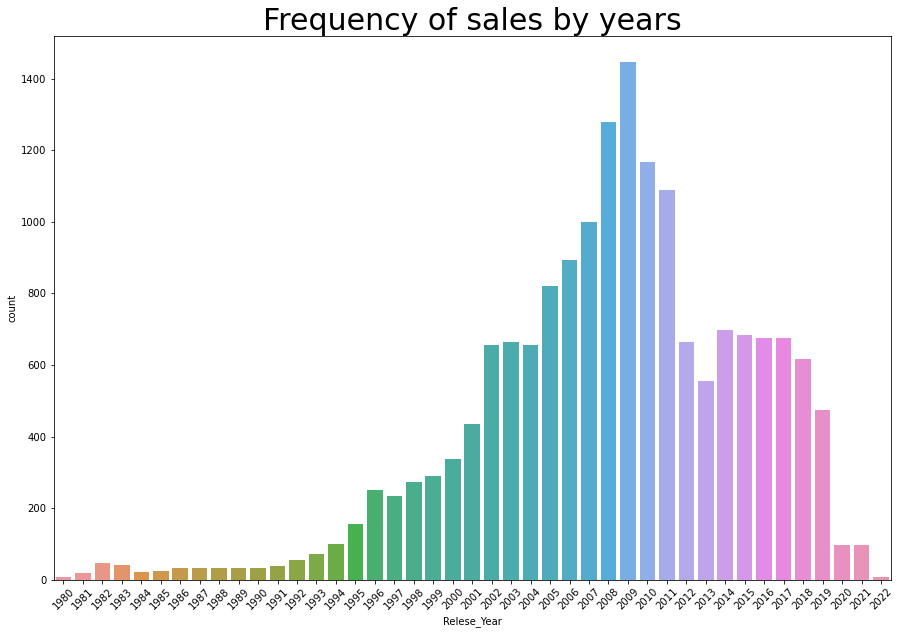

Relese Year  Game
29         2009  1446
28         2008  1279
30         2010  1167
31         2011  1088
27         2007   999
26         2006   894
25         2005   821
34         2014   697
35         2015   685
37         2017   676

In [9]:
#Frequency of Games by years

plt.figure(figsize=(15, 10))
sns.countplot(x="Relese_Year", data=clean_df).set_title("Frequency of sales by years",fontsize=30)
plt.xticks(rotation=45)
plt.show()

year_game = clean_df.pivot_table(index = 'Relese_Year', values= 'Game', aggfunc='count' ).reset_index()
year_game.columns = ['Relese Year', 'Game']
year_game = year_game.sort_values('Game', ascending=False)
year_game.head(10)

**Conclusion:** The years with the highest game releases are between 2008-2010

In [10]:
clean_df.corr()

Pos  NA_Sales  PAL_Sales  Japan_Sales  Other_Sales  \
Pos           1.000000  0.073428   0.071027     0.073542     0.074379   
NA_Sales      0.073428  1.000000   0.705540     0.063009     0.717303   
PAL_Sales     0.071027  0.705540   1.000000     0.116696     0.841534   
Japan_Sales   0.073542  0.063009   0.116696     1.000000     0.129240   
Other_Sales   0.074379  0.717303   0.841534     0.129240     1.000000   
Total_Sales  -0.104049  0.029361   0.039182    -0.013053     0.036647   
Relese_Month  0.057991  0.094505   0.078238    -0.017047     0.087403   
Relese_Year   0.155601 -0.073579   0.006862    -0.136384     0.030292   
Hit_Games    -0.270035  0.324562   0.293375     0.016109     0.288482   

              Total_Sales  Relese_Month  Relese_Year  Hit_Games  
Pos             -0.104049      0.057991     0.155601  -0.270035  
NA_Sales         0.029361      0.094505    -0.073579   0.324562  
PAL_Sales        0.039182      0.078238     0.006862   0.293375  
Japan_Sales     -0.013053     -0.017047    -0.136384   0.016109  
Other_Sales      0.036647      0.087403     0.030292   0.288482  
Total_Sales      1.000000      0.024426    -0.082202   0.245717  
Relese_Month     0.024426      1.000000    -0.049020   0.050838  
Relese_Year     -0.082202     -0.049020     1.000000  -0.088680  
Hit_Games        0.245717      0.050838    -0.088680   1.000000

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Month

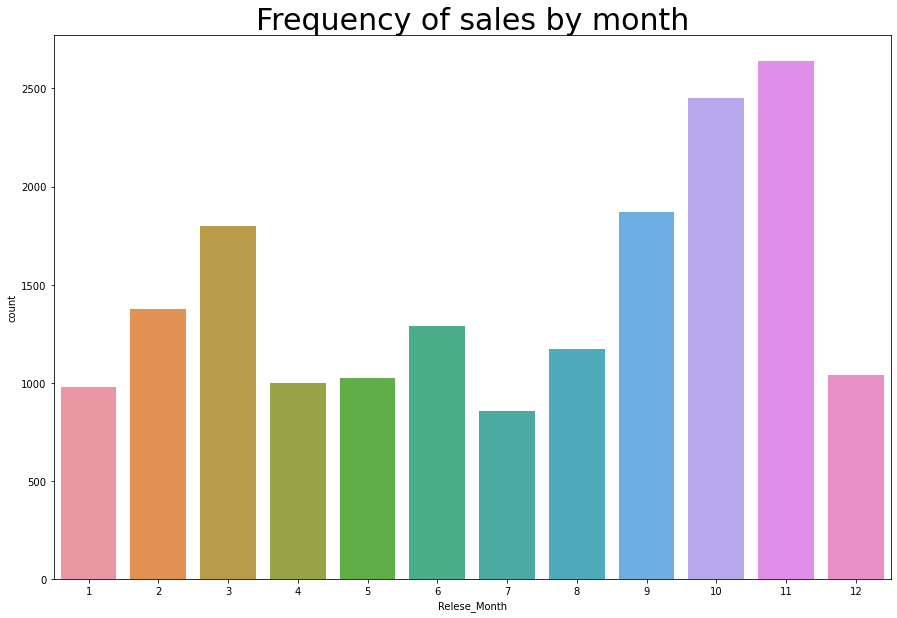

Relese Month  Game
10            11  2639
9             10  2450
8              9  1868
2              3  1799
1              2  1376
5              6  1288
7              8  1170
11            12  1039
4              5  1025
3              4   999

In [11]:
#Frequency of Games by month

plt.figure(figsize=(15, 10))
sns.countplot(x="Relese_Month", data=clean_df).set_title("Frequency of sales by month",fontsize=30)
plt.show()

month_game = clean_df.pivot_table(index = 'Relese_Month', values= 'Game', aggfunc='count' ).reset_index()
month_game.columns = ['Relese Month', 'Game']
month_game = month_game.sort_values('Game', ascending=False)
month_game.head(10)


**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Console

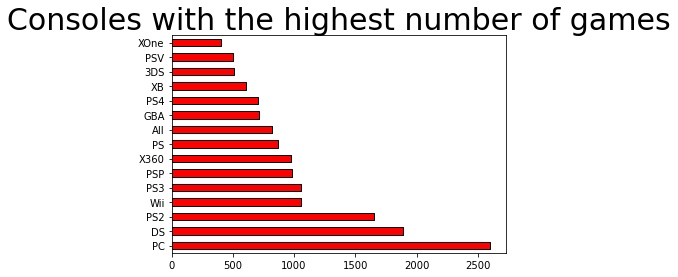

Console  Game
22      PC  2604
8       DS  1890
26     PS2  1650
40     Wii  1060
27     PS3  1053
31     PSP   987
42    X360   974
25      PS   866
4      All   817
10     GBA   711
28     PS4   707
43      XB   604
2      3DS   512
32     PSV   502
45    XOne   405

In [12]:
# Consoles with the most Games

clean_df["Console"].value_counts()[:15].plot(kind = 'barh', color="r",edgecolor='black').set_title('Consoles with the highest number of games',fontsize=30)
plt.rcParams["figure.figsize"] = [30, 13]
plt.show()

console_game = clean_df.pivot_table(index = 'Console', values= 'Game', aggfunc='count' ).reset_index()
console_game.columns = ['Console', 'Game']
console_game = console_game.sort_values('Game', ascending=False)
console_game.head(15)

**Conclusion:** The consoles with the most games are PC Nintendo DS & PS2

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Publisher

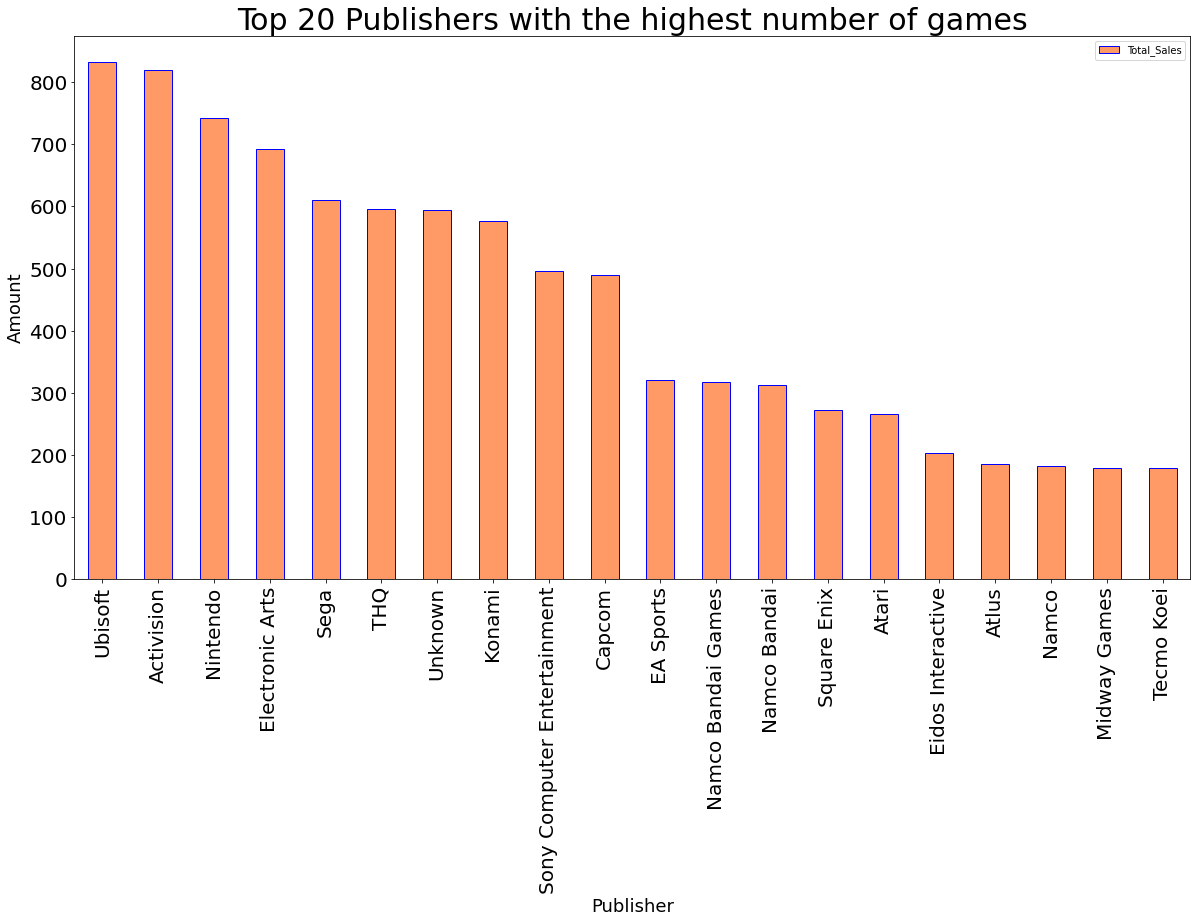

Publisher  Game
977                      Ubisoft   833
40                    Activision   820
658                     Nintendo   743
280              Electronic Arts   692
814                         Sega   610
899                          THQ   596
982                      Unknown   595
509                       Konami   577
846  Sony Computer Entertainment   496
164                       Capcom   490
266                    EA Sports   320
633           Namco Bandai Games   317
632                 Namco Bandai   312
864                  Square Enix   272
86                         Atari   266

In [13]:
# publishers with the most Games

top_publishers = clean_df[["Publisher", "Total_Sales"]].groupby("Publisher").count().sort_values("Total_Sales", ascending=False).head(20)
top_publishers.plot.bar(title="Top 20 Publishers with the highest number of games",figsize=(20,10),fontsize=20,color = '#ff9966',edgecolor='blue').title.set_size(30)
plt.ylabel("Amount",fontsize=18)
plt.xlabel("Publisher",fontsize=18) 
plt.show()

Publisher_game = clean_df.pivot_table(index = 'Publisher', values= 'Game', aggfunc='count' ).reset_index()
Publisher_game.columns = ['Publisher', 'Game']
Publisher_game = Publisher_game.sort_values('Game', ascending=False)
Publisher_game.head(15)

Conclusion: The leading Publishers are Ubisoft, Activision & Nintendo

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Developer

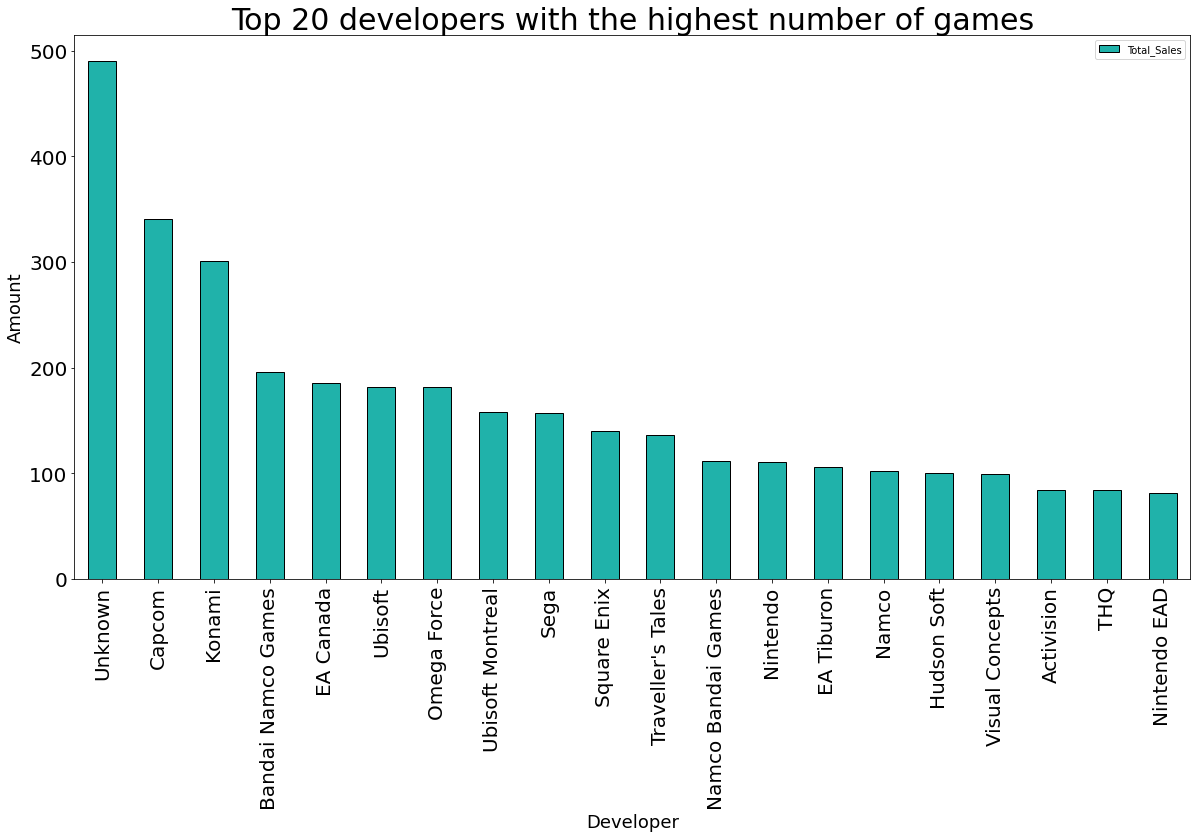

Developer  Game
3040             Unknown   490
521               Capcom   341
1579              Konami   301
312   Bandai Namco Games   196
877            EA Canada   186
3009             Ubisoft   182
2072         Omega Force   182
3018    Ubisoft Montreal   158
2534                Sega   157
2690         Square Enix   140
2962   Traveller's Tales   136
1931  Namco Bandai Games   112
1995            Nintendo   111
892           EA Tiburon   106
1927               Namco   102

In [14]:
# Developers with the most Games

top_publishers = clean_df[["Developer", "Total_Sales"]].groupby("Developer").count().sort_values("Total_Sales", ascending=False).head(20)
top_publishers.plot.bar(title="Top 20 developers with the highest number of games",figsize=(20,10),fontsize=20,color ='lightseagreen',edgecolor='black').title.set_size(30)
plt.ylabel("Amount",fontsize=18)
plt.xlabel("Developer",fontsize=18) 
plt.show()

developer_game = clean_df.pivot_table(index = 'Developer', values= 'Game', aggfunc='count' ).reset_index()
developer_game.columns = ['Developer', 'Game']
developer_game = developer_game.sort_values('Game', ascending=False)
developer_game.head(15)

**Conclusion:** The leading developers are who have released games are Capcom & Konami

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Genre

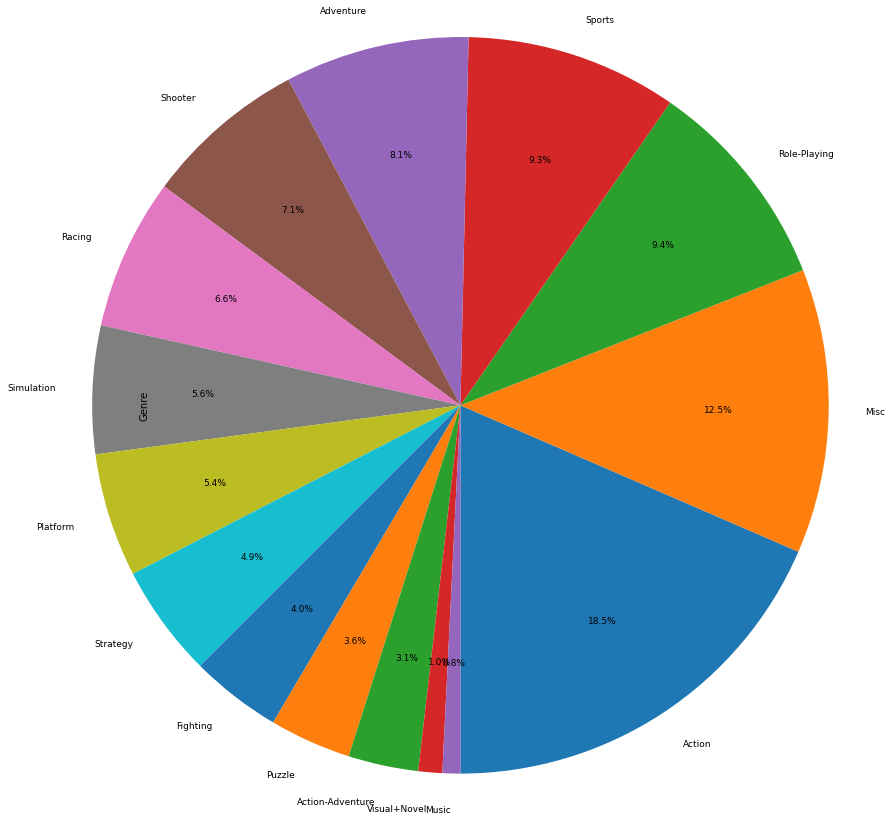

In [15]:
fig, axes = plt.subplots(figsize=(11, 17))
clean_df["Genre"].value_counts()[:15].plot(kind = 'pie', autopct='%1.1f%%', startangle=270, fontsize=9, pctdistance=0.7, radius = 1.5)
plt.show()

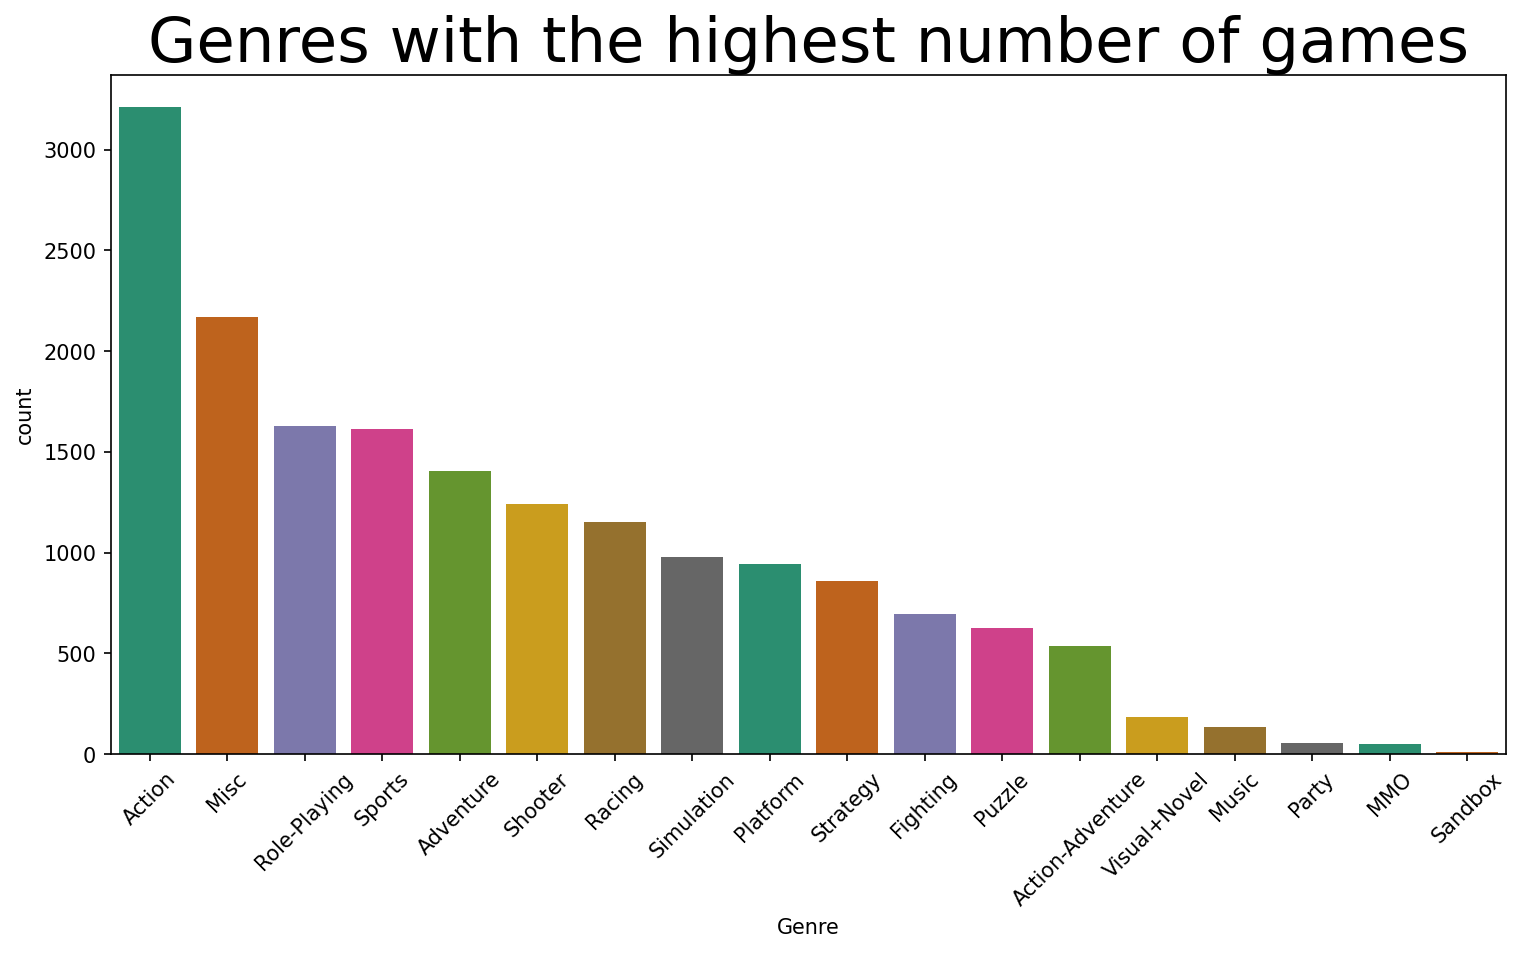

Genre  Game
0         Action  3212
5           Misc  2169
11  Role-Playing  1629
15        Sports  1613
2      Adventure  1405
13       Shooter  1240
10        Racing  1153
14    Simulation   976
8       Platform   943
16      Strategy   859

In [16]:
# Genre with the most Games

plt.figure(figsize=(12,6), dpi=150)
sns.countplot(data=clean_df,
              x="Genre",
              order = clean_df["Genre"].value_counts().index,
              palette="Dark2").set_title("Genres with the highest number of games",fontsize=30)
plt.xticks(rotation=45)
plt.show()

genre_game = clean_df.pivot_table(index = 'Genre', values= 'Game', aggfunc='count' ).reset_index()
genre_game.columns = ['Genre', 'Game']
genre_game = genre_game.sort_values('Game', ascending=False)
genre_game.head(10)

**conclusion:**  Games belonging to Action genre are leaders in the number of games per genre,
they control almost 20 percent of the video games market share and they are popular more than any other genre

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA_Sales, PAL_Sales & Japan_Sales

.

The average sales in each region

In [17]:
a=(clean_df['NA_Sales'].mean()*1000000)
b=(clean_df['PAL_Sales'].mean()*1000000)
c=(clean_df['Japan_Sales'].mean()*1000000)
d=(clean_df['Other_Sales'].mean()*1000000)
e=(clean_df['Total_Sales'].mean()*1000000)

print("The average sales in North America =", (f"{a:,.3f}"))
print("The average sales in Europe =",(f"{b:,.3f}"))
print("The average sales in Japan =",(f"{c:,.3f}"))
print("The average sales in other regions =",(f"{d:,.3f}"))
print("The average sales globally =",(f"{e:,.3f}"))

The average sales in North America = 138,874,020,701.092
The average sales in Europe = 79,487,047,521.016
The average sales in Japan = 27,123,005,661.348
The average sales in other regions = 26,922,856,979.470
The average sales globally = 1,302,763,195,516.669


**Conclusion:** The average game purchases in North America are higher than any other region

.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Bivariate Analysis

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

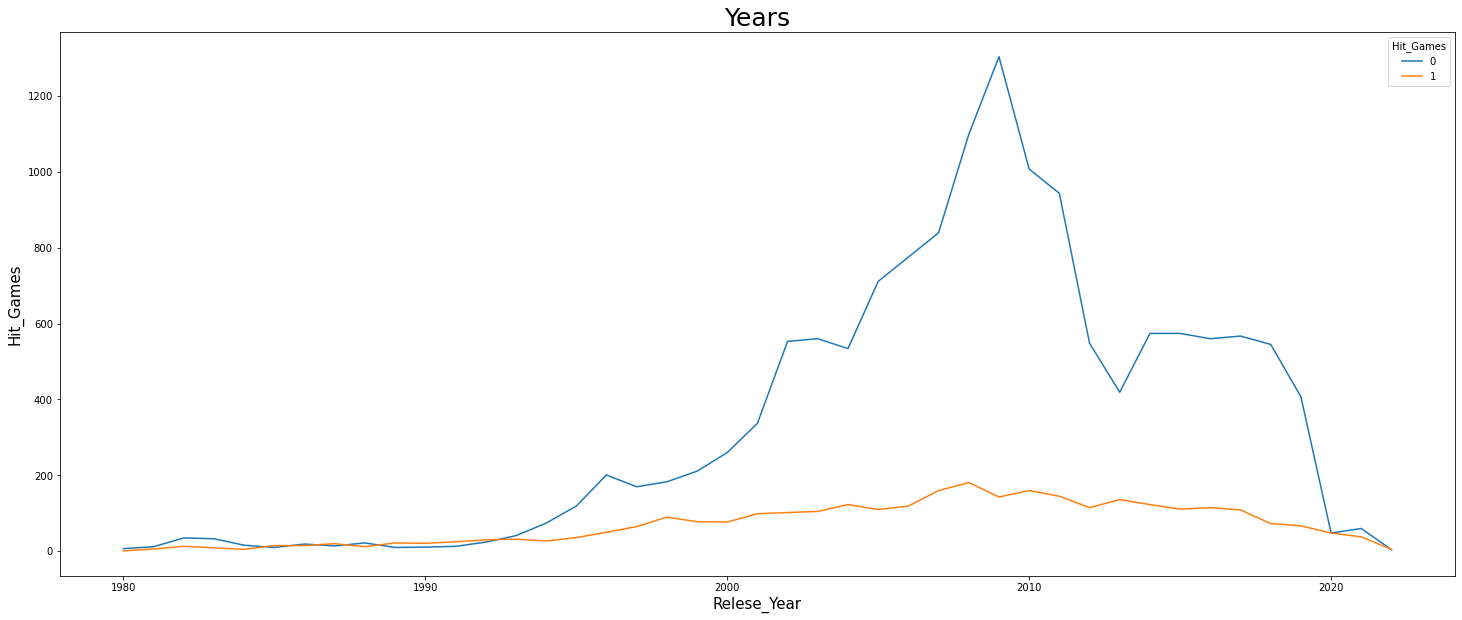

In [18]:
ct_year = pd.crosstab(clean_df['Relese_Year'],clean_df['Hit_Games'])
ct_year.plot(kind='line',figsize=(25,10))
plt.title('Years', fontsize=25)
plt.xlabel('Relese_Year', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

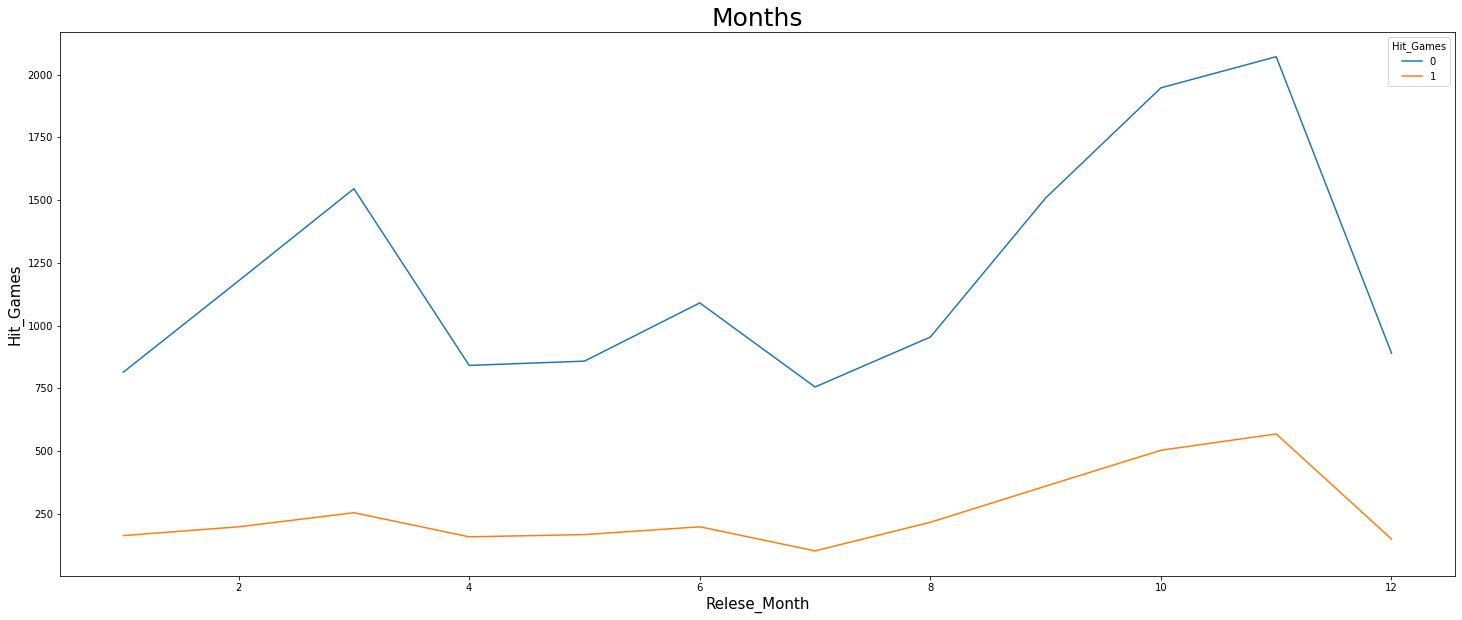

In [19]:
ct_month = pd.crosstab(clean_df['Relese_Month'],clean_df['Hit_Games'])
ct_month.plot(kind='line',figsize=(25,10))
plt.title('Months', fontsize=25)
plt.xlabel('Relese_Month', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

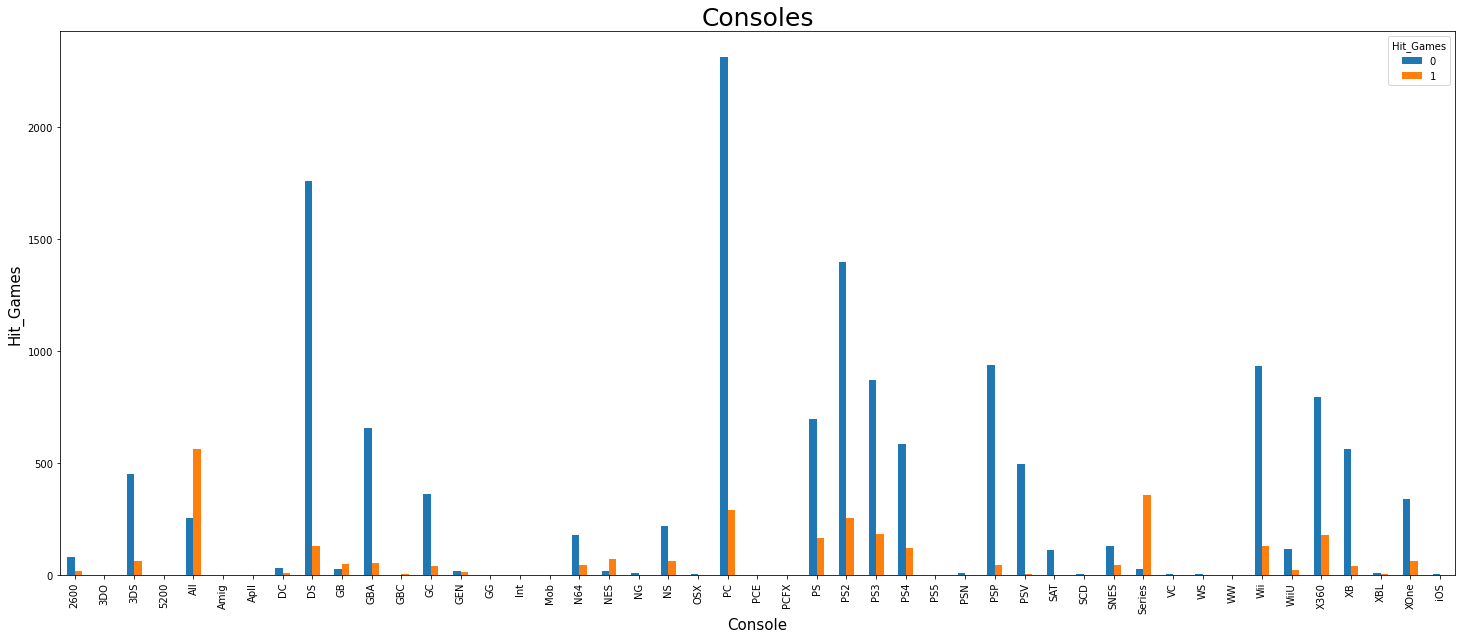

In [20]:
ct_console = pd.crosstab(clean_df['Console'],clean_df['Hit_Games'])
ct_console.plot(kind='bar',figsize=(25,10))
plt.title('Consoles', fontsize=25)
plt.xlabel('Console', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

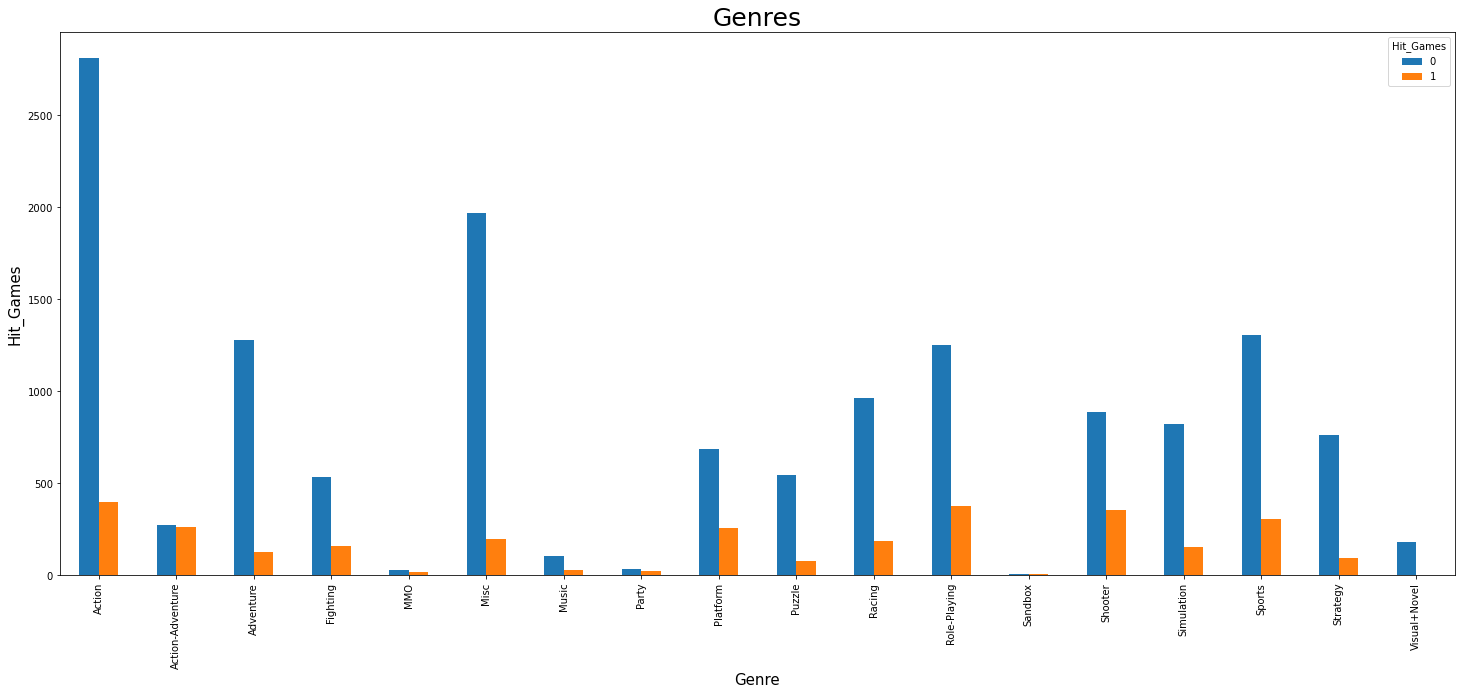

In [21]:
ct_genre = pd.crosstab(clean_df['Genre'],clean_df['Hit_Games'])
ct_genre.plot(kind='bar',figsize=(25,10))
plt.title('Genres', fontsize=25)
plt.xlabel('Genre', fontsize=15)
plt.ylabel('Hit_Games', fontsize=15)
plt.show()

In [22]:
from scipy.stats import chi2_contingency
ct_list = ['ct_year','ct_month','ct_console','ct_genre']
for i,ct in enumerate([ct_year,ct_month,ct_console,ct_genre]):
    if (chi2_contingency(ct)[1] < 0.05):
        print(f"Hit_games and {ct_list[i]} are highly correlated columns")
        print(f"The correlation value is {chi2_contingency(ct)[1]} \n")

Hit_games and ct_year are highly correlated columns
The correlation value is 2.582625807611994e-128 

Hit_games and ct_month are highly correlated columns
The correlation value is 6.756712932478744e-18 

Hit_games and ct_console are highly correlated columns
The correlation value is 0.0 

Hit_games and ct_genre are highly correlated columns
The correlation value is 4.3906689885818403e-190 



Years

Total_Sales
Relese_Year             
1998          1327710000
2011          1259640000
2007          1102020000
2009           953990000
2008           873400000
2006           849710000
2003           828680000
2004           826840000
2010           798430000
2017           746250000

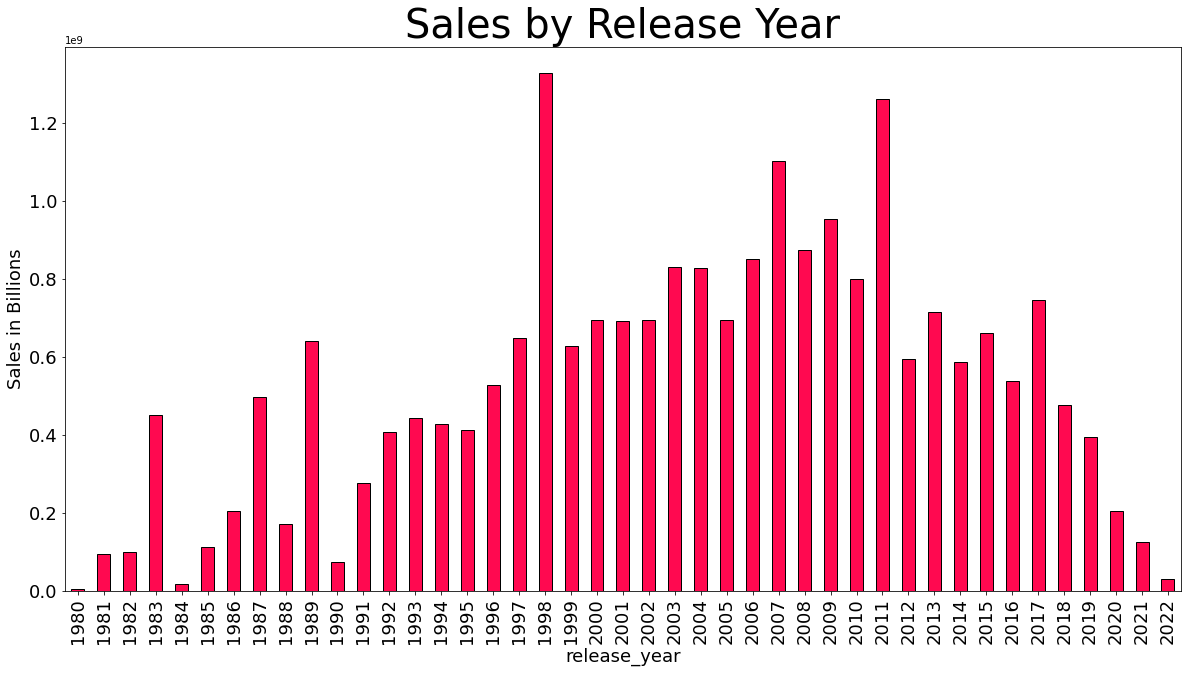

In [23]:
# Years with the most sales

title = "Sales by Release Year"
Year_sales = clean_df.groupby("Relese_Year").sum()["Total_Sales"].plot.bar(fontsize=18,color = '#ff0950',edgecolor='black',title=title,figsize=(20,10))
Year_sales.title.set_size(40)
Year_sales.set_ylabel("Sales in Billions",fontsize=18)
Year_sales.set_xlabel("release_year",fontsize=18)

# top 10 years with the highest total sales
sales_year = clean_df.groupby("Relese_Year").agg({"Total_Sales": pd.Series.sum})
sales_year.nlargest(10, "Total_Sales")

**Conclusion:** The years with the most sales are 1998, 2011 & 2007

20037812.5

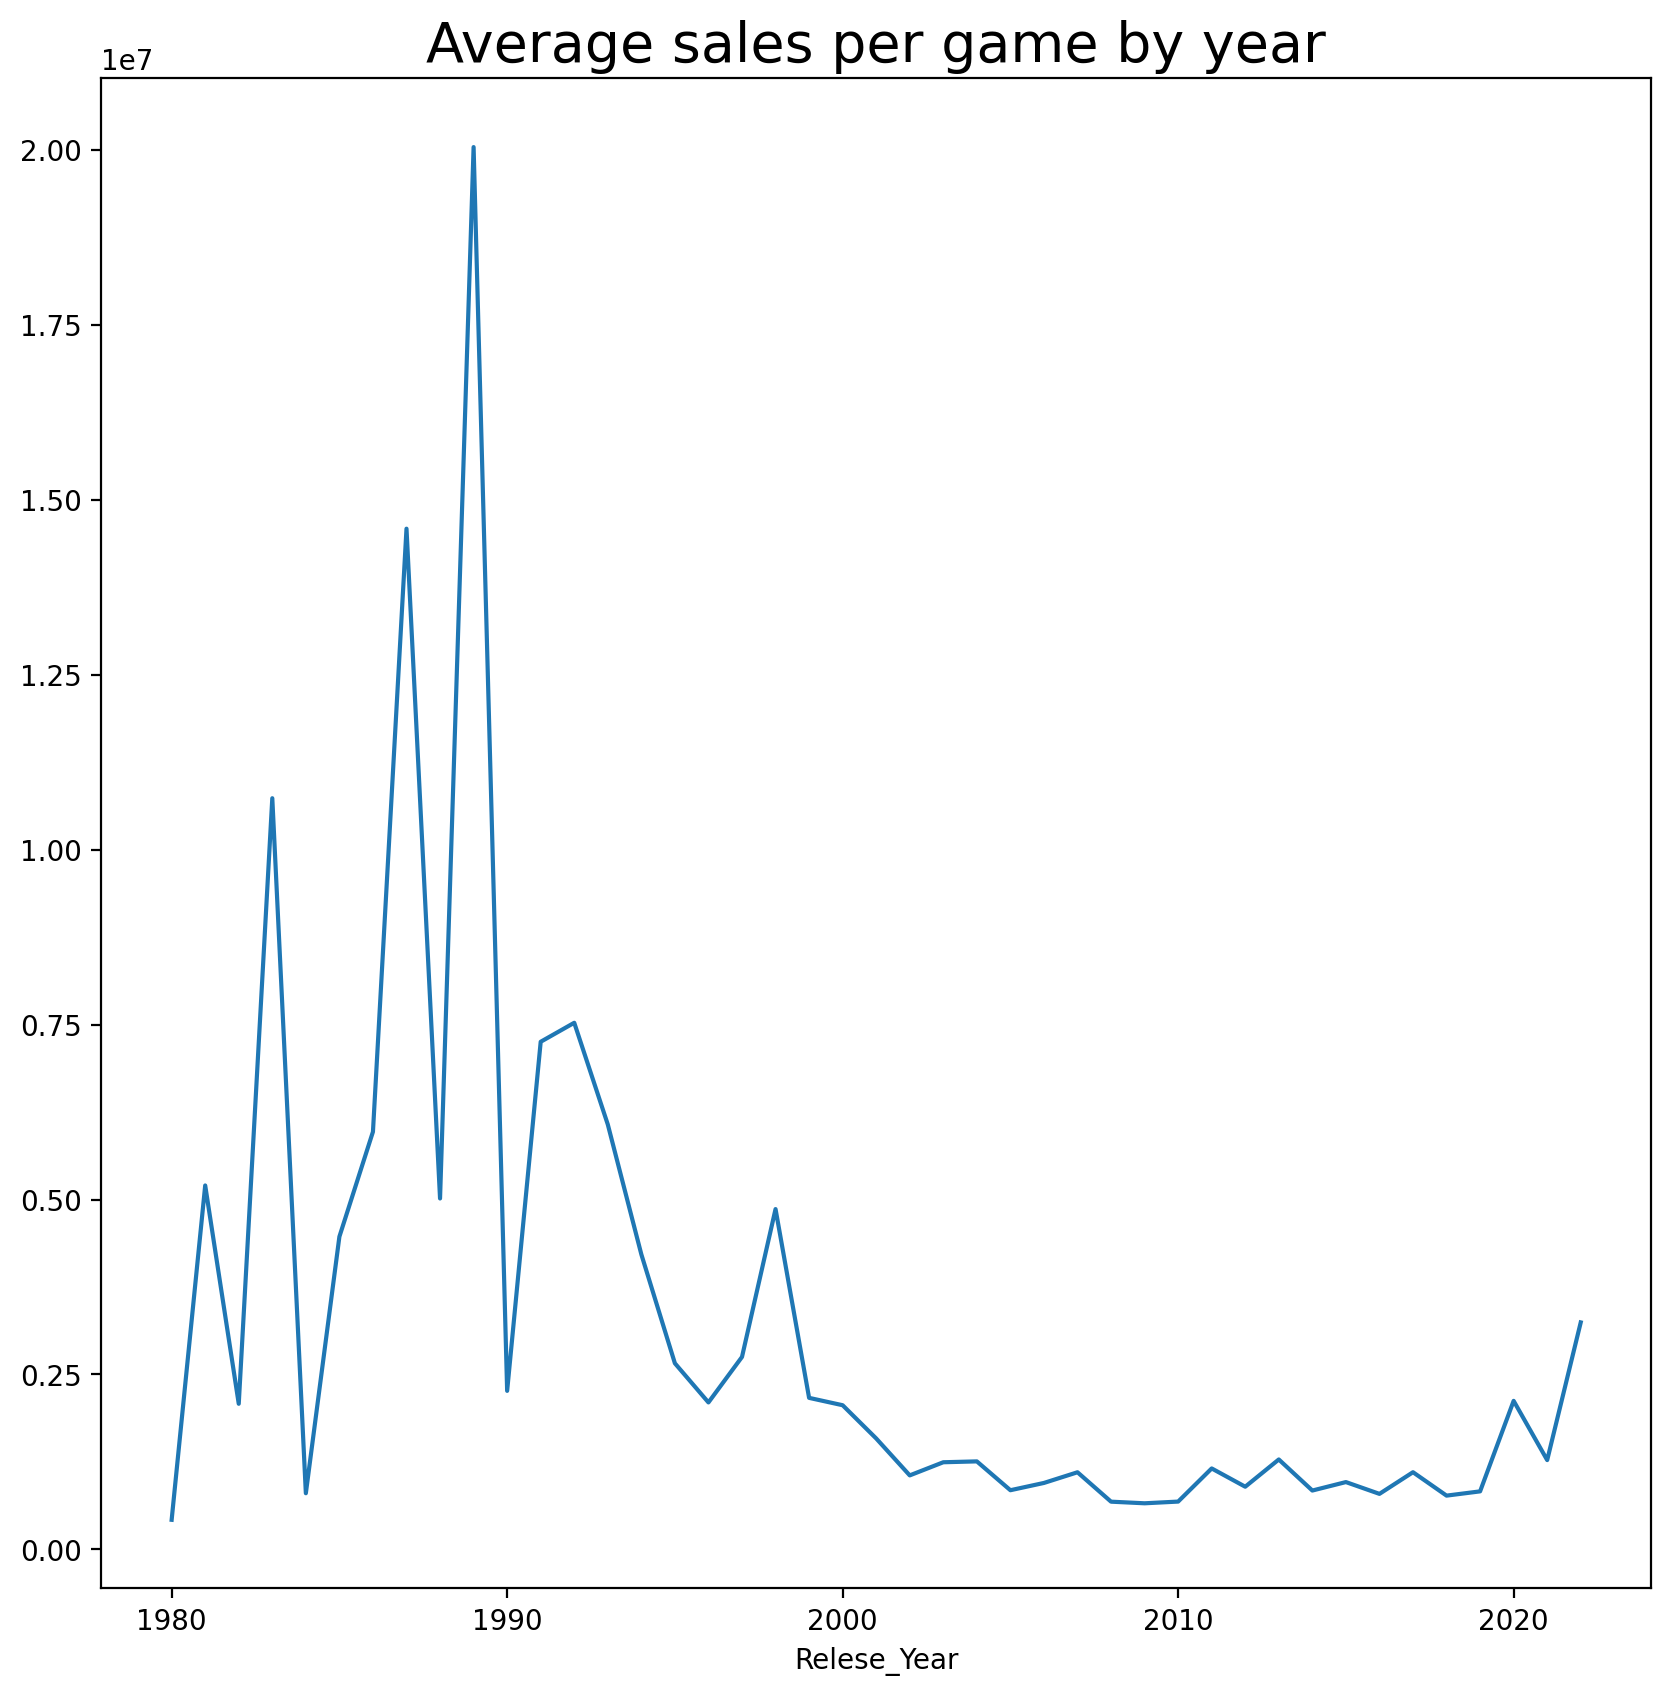

In [24]:
data = clean_df
df1 = data.groupby(['Relese_Year'])
plt.figure(figsize=(10,7), dpi=200)
df1_mean = df1['Total_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales per game by year', fontsize=20)
df1_mean.max()

**Conclusion:** This year most games received the highest average purchases is 1989

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Month

1922847.1411901983

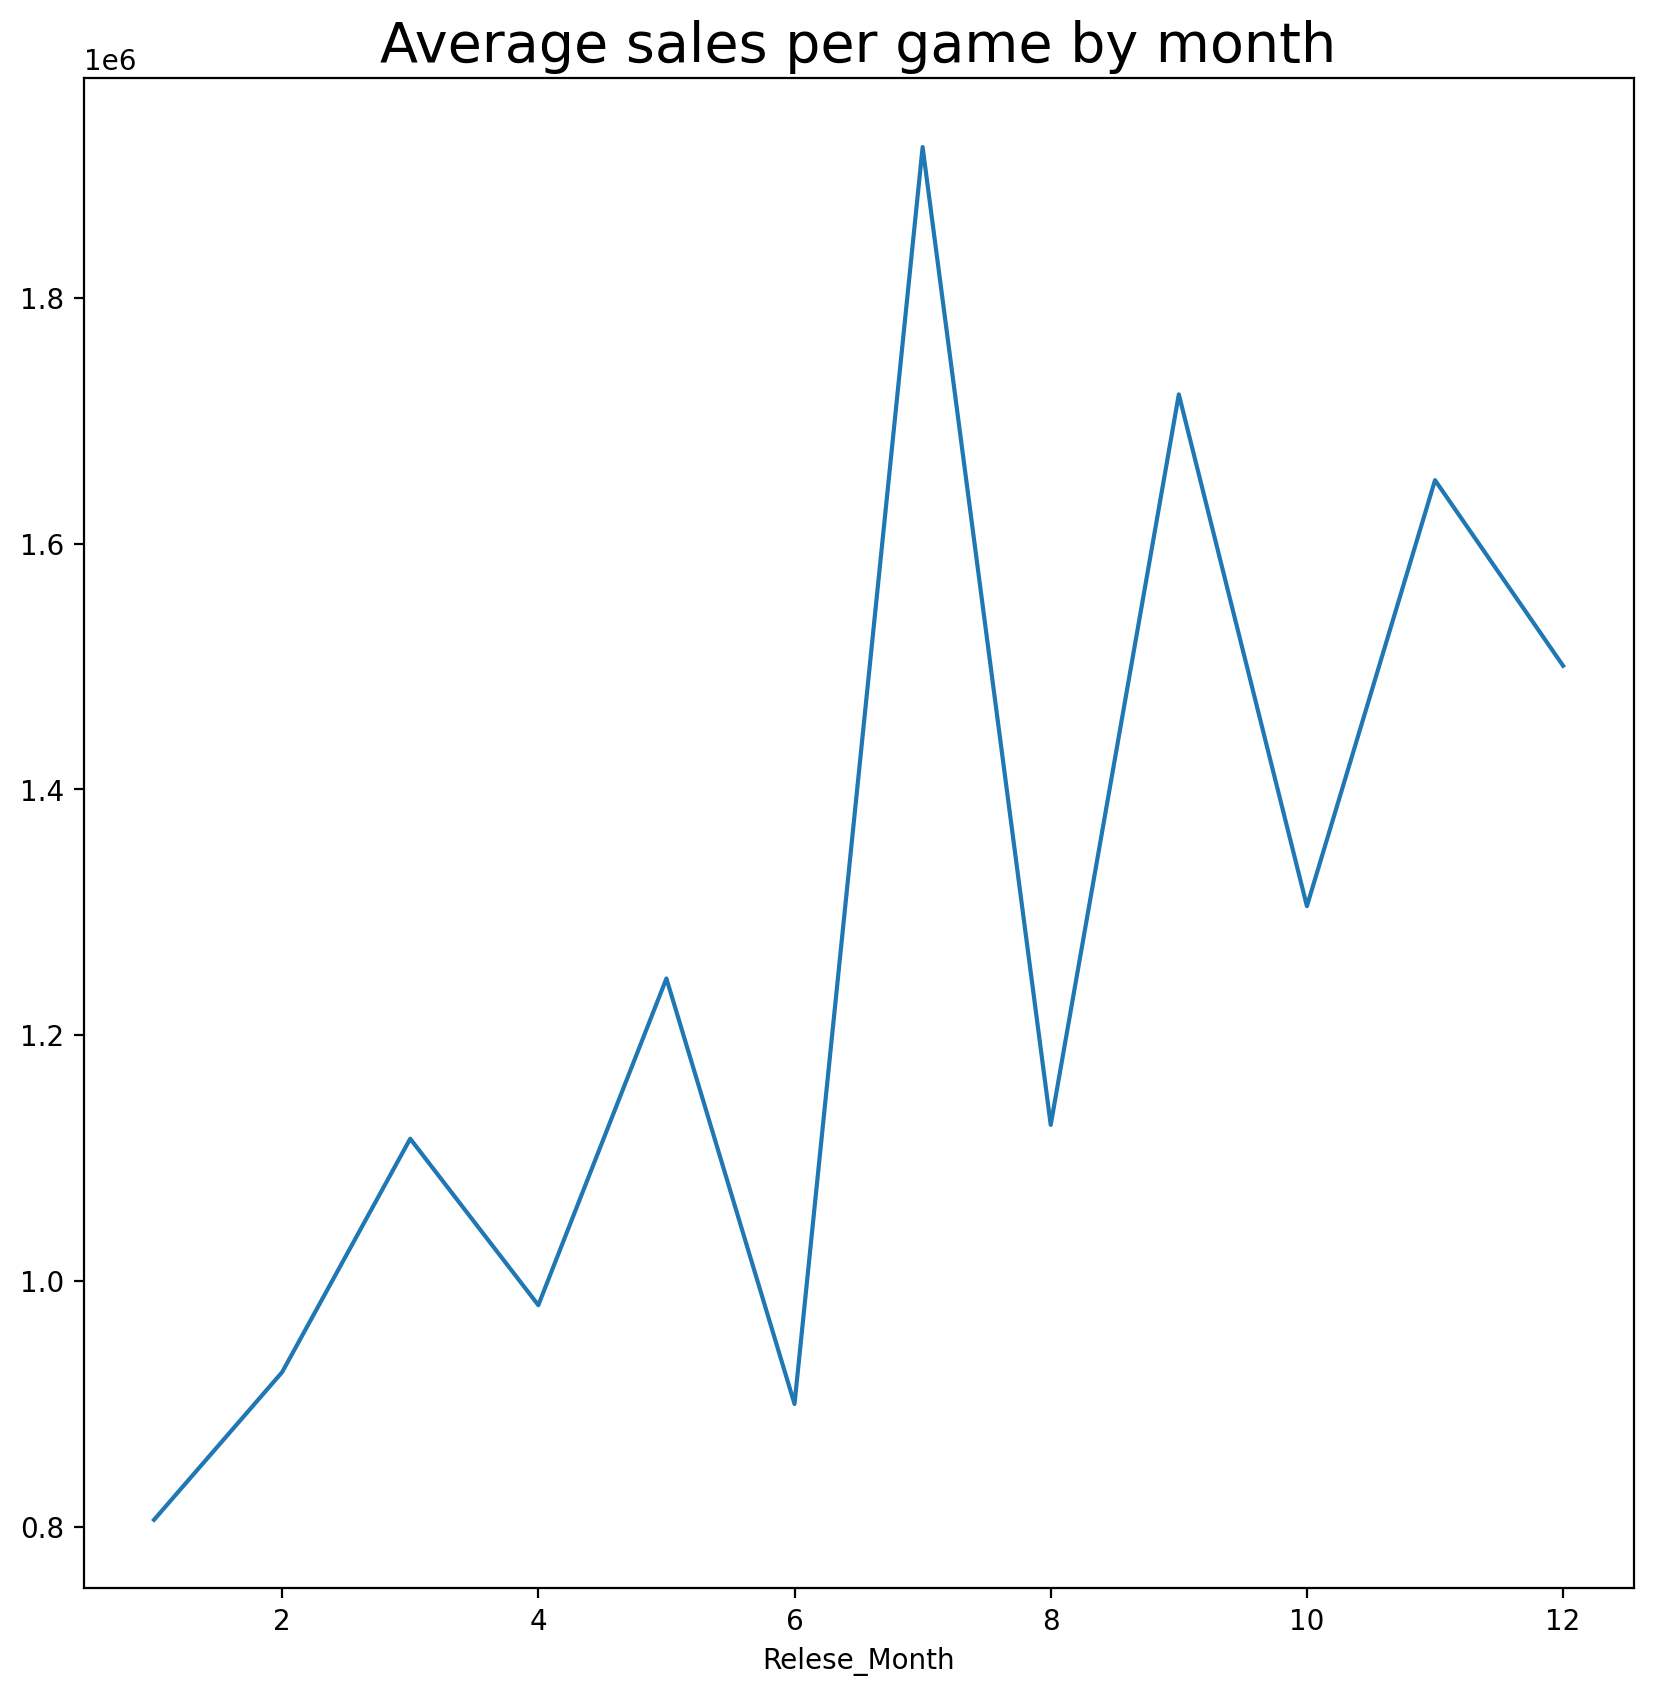

In [25]:
data = clean_df
df1 = data.groupby(['Relese_Month'])
plt.figure(figsize=(10,7), dpi=200)
df1_mean = df1['Total_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales per game by month', fontsize=20)
df1_mean.max()

**Conclusion:** The popular month to purchase games is July

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Console

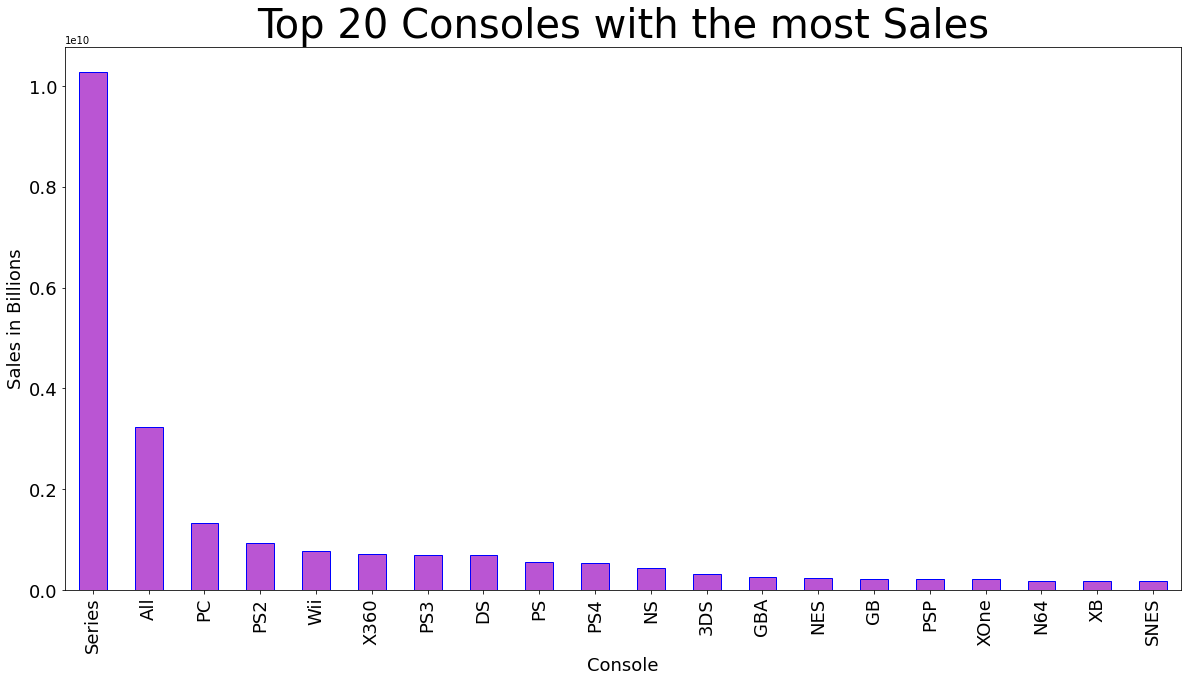

Total_Sales
Console             
Series   10267520000
All       3243790000
PC        1336860000
PS2        939530000
Wii        776280000
X360       716640000
PS3        706850000
DS         703580000
PS         552420000
PS4        546180000

In [26]:
#Sales from Total Global sales including Japan, Europe or North America

title = "Top 20 Consoles with the most Sales"
console_sales = clean_df.groupby("Console")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title,  color = 'mediumorchid',edgecolor='blue'   ,figsize=(20,10),fontsize=18)
    
console_sales.title.set_size(40)
console_sales.set_ylabel("Sales in Billions",fontsize=18)
console_sales.set_xlabel("Console",fontsize=18)
plt.show()

# Top 10 consoles with the most sales
sales_console = clean_df.groupby("Console").agg({"Total_Sales": pd.Series.sum})
sales_console.nlargest(10, "Total_Sales")

**Conclusion:** The Consoles with the most sales are Xbox Series X & PC

26462680.412371133

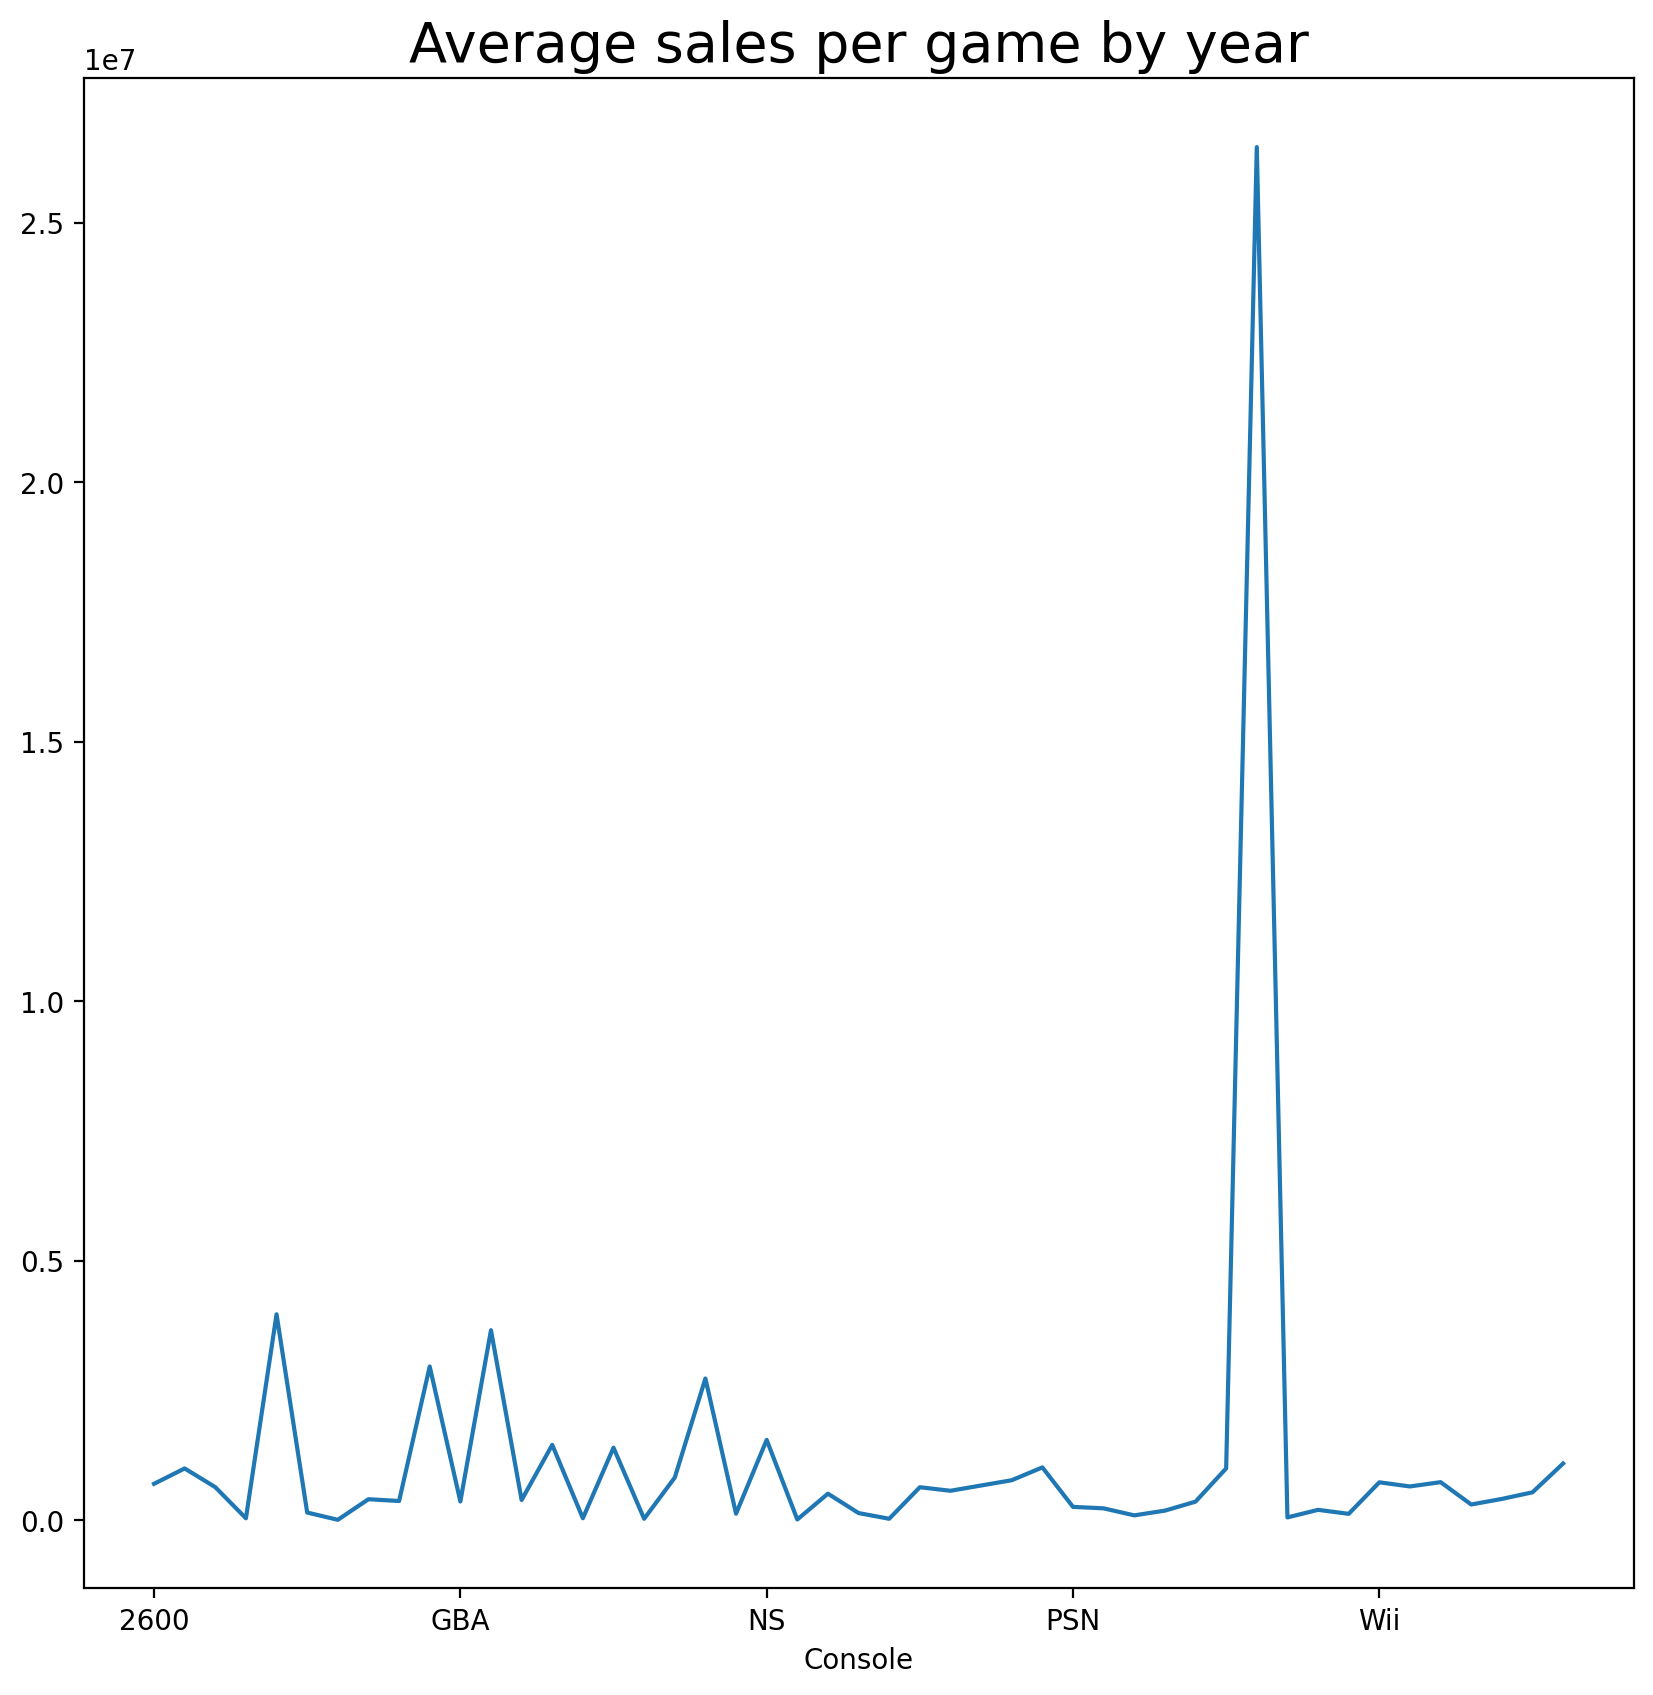

In [27]:
data = clean_df
df1 = data.groupby(['Console'])
plt.figure(figsize=(10,10), dpi=200)
df1_mean = df1['Total_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales per game by year', fontsize=20)
df1_mean.max()

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Other_Sales
Console             
PS2        108500000
PS3         84600000
PS4         62130000
X360        53890000
Wii         30510000
PSP         26960000
DS          25430000
PS          22830000
XOne        17410000
PC          10070000

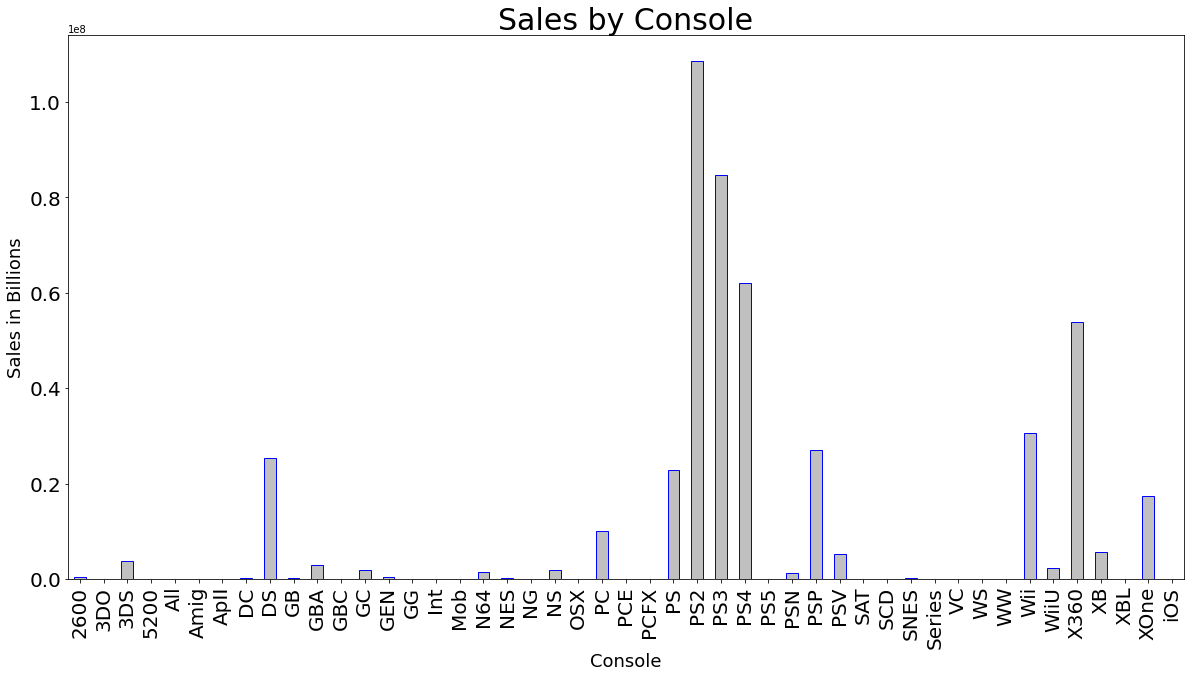

In [28]:
#Sales from Global sales excluding Japan, Europe or North America

title = "Sales by Console"

console_sales1 = clean_df.groupby("Console")\
    .sum()\
     ["Other_Sales"].plot.bar(title=title,color = 'silver',edgecolor='blue'  ,fontsize=20,figsize=(20,10))
console_sales1.title.set_size(30)
console_sales1.set_ylabel("Sales in Billions",fontsize=18)
console_sales1.set_xlabel("Console",fontsize=18)

# Top 10 consoles with the most sales
sales_console1 = clean_df.groupby("Console").agg({"Other_Sales": pd.Series.sum})
sales_console1.nlargest(10, "Other_Sales")

**Conclusion:** The Consoles with the most sales Unrelated to sales in NA, Europe or Japan are Xbox Series X & PC

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Developer

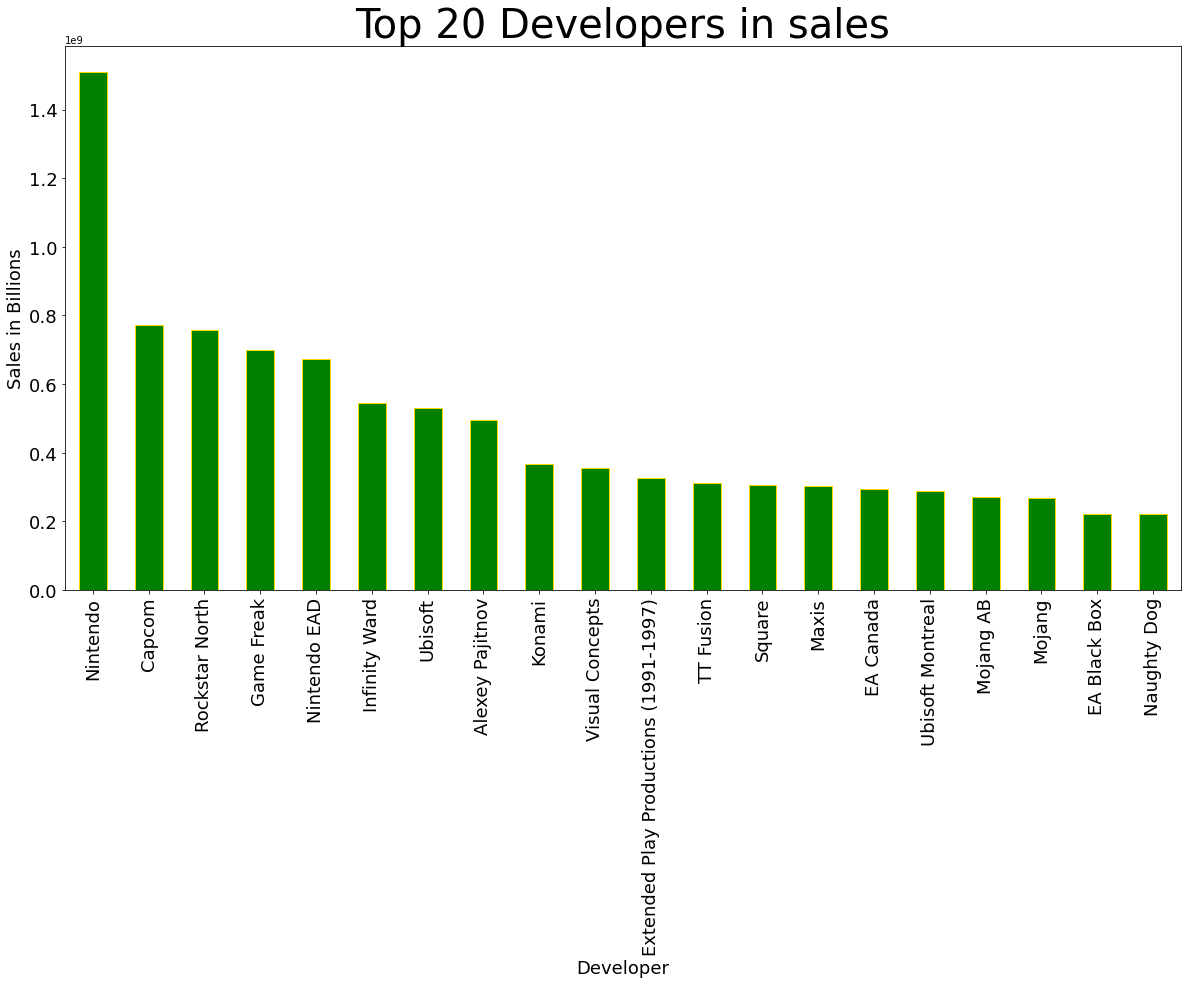

Total_Sales
Developer                   
Nintendo          1508700000
Capcom             772140000
Rockstar North     758620000
Game Freak         700070000
Nintendo EAD       674230000
Infinity Ward      546110000
Ubisoft            529870000
Alexey Pajitnov    496400000
Konami             367240000
Visual Concepts    355550000

In [29]:
#Developers with the most sales

title = "Top 20 Developers in sales"

developer_sales = clean_df.groupby("Developer")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title,color ='green',edgecolor='gold'  ,figsize=(20,10),fontsize=18)
    
developer_sales.title.set_size(40)
developer_sales.set_ylabel("Sales in Billions",fontsize=18)
developer_sales.set_xlabel("Developer",fontsize=18)
plt.show()

sales_developer = clean_df.groupby("Developer").agg({"Total_Sales": pd.Series.sum})
sales_developer.nlargest(10, "Total_Sales")

**Conclusion:** The Developers with the most sales are Nintendo & Capcom 

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Publisher

Total_Sales
Publisher                               
Nintendo                      4717250000
Electronic Arts               1500930000
Activision                    1141970000
Ubisoft                       1105840000
Rockstar Games                1017420000
Capcom                         850740000
Sony Computer Entertainment    844050000
EA Sports                      785220000
Sega                           620520000
Mojang                         515000000

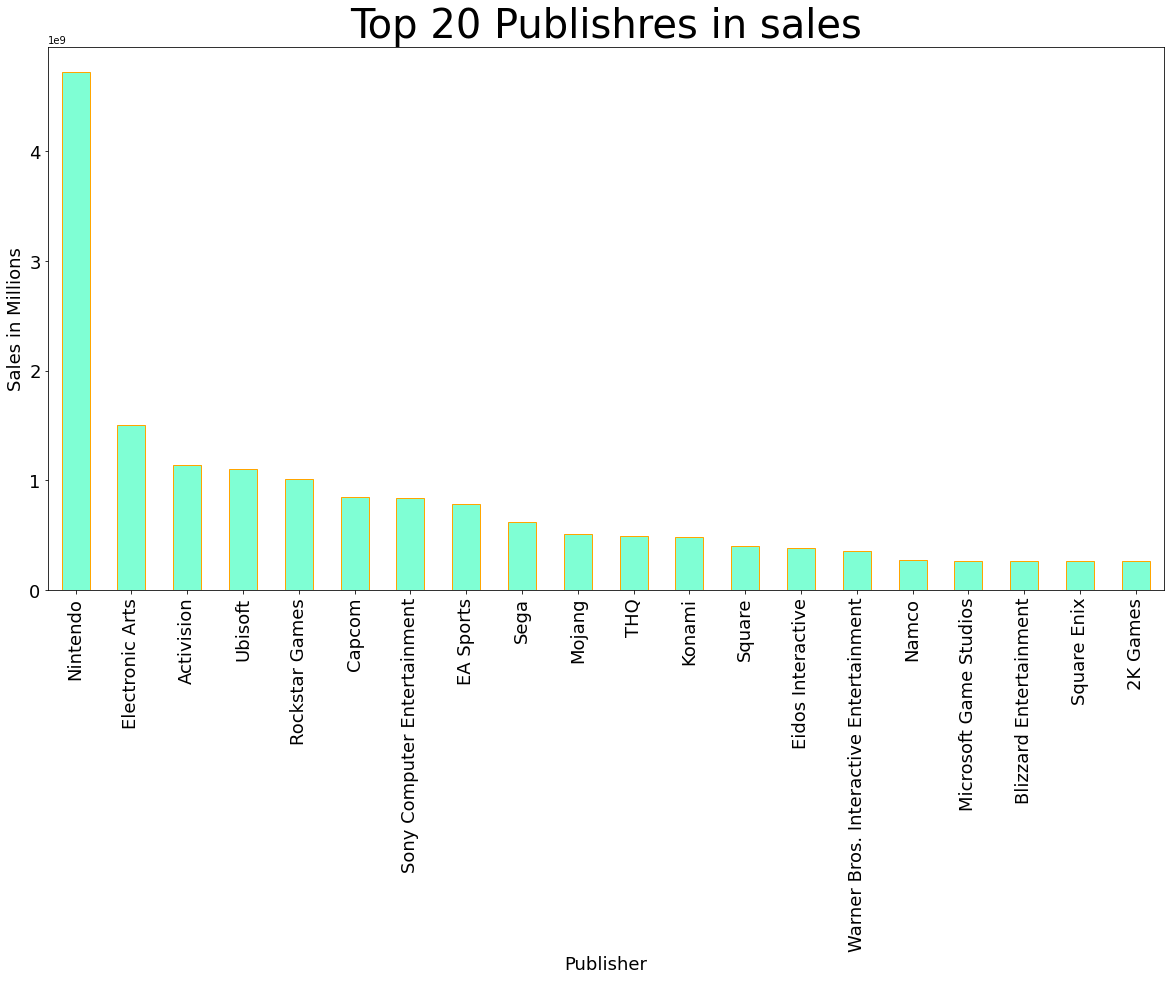

In [30]:
#Publishers with the most sales

title = "Top 20 Publishres in sales"

Publisher_sales = clean_df.groupby("Publisher")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title, color = 'aquamarine',edgecolor='orange',figsize=(20,10),fontsize=18)
    
Publisher_sales.title.set_size(40)
Publisher_sales.set_ylabel("Sales in Millions",fontsize=18)
Publisher_sales.set_xlabel("Publisher",fontsize=18)


sales_Publisher = clean_df.groupby("Publisher").agg({"Total_Sales": pd.Series.sum})
sales_Publisher.nlargest(10, "Total_Sales")

**Conclusion:** The Publishers with the most sales are Nintendo & Electronic Arts 

:

**Conclusion from the last 2 graphs:**  Nintendo is one of the biggest Developer & Publisher company in the world

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Genre

Total_Sales
Genre                        
Action-Adventure   3475160000
Role-Playing       2981810000
Shooter            2889700000
Sports             2310290000
Platform           1891700000
Action             1837750000
Racing             1293370000
Simulation         1073220000
Puzzle             1007770000
Misc                974480000

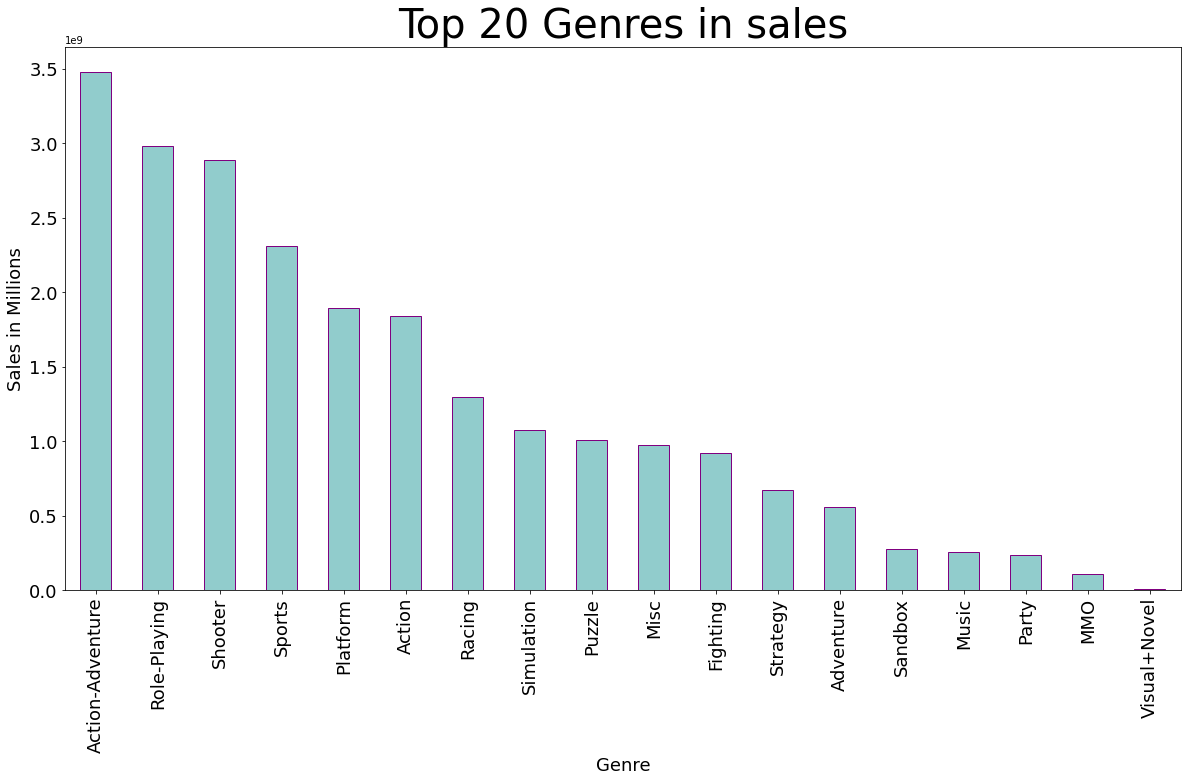

In [31]:
#Genres with the most sales

title = "Top 20 Genres in sales"

genre_sales = clean_df.groupby("Genre")\
    .sum()\
    .sort_values(by="Total_Sales", ascending=False)\
    .head(20)["Total_Sales"]\
    .plot.bar(title=title, color = '#91cccc',edgecolor='purple',figsize=(20,10),fontsize=18)
    
genre_sales.title.set_size(40)
genre_sales.set_ylabel("Sales in Millions",fontsize=18)
genre_sales.set_xlabel("Genre",fontsize=18)


sales_genre = clean_df.groupby("Genre").agg({"Total_Sales": pd.Series.sum})
sales_genre.nlargest(10, "Total_Sales")

**Conclusion:** The Genres with the most sales are Action-Adventure & Role-Playing

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Other Sales

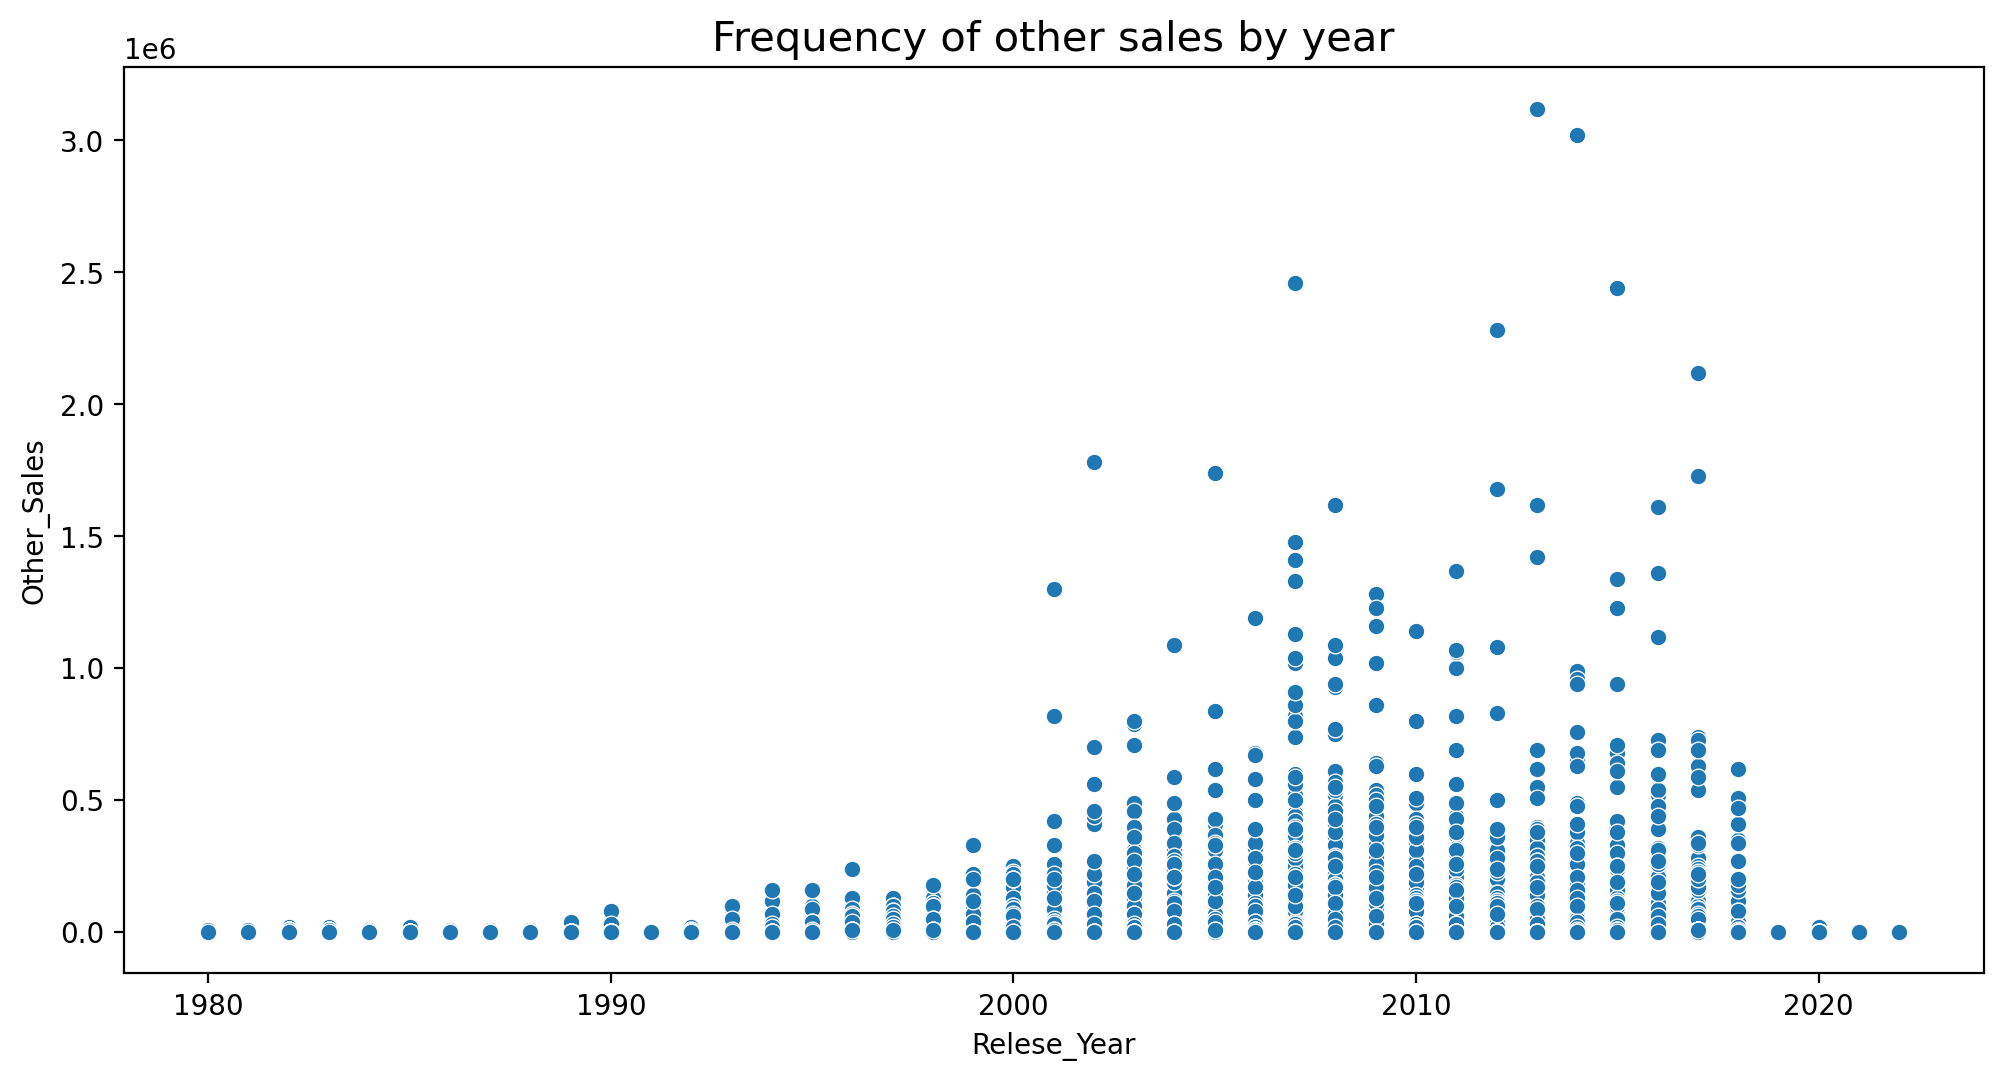

In [32]:
plt.figure(figsize=(12,6), dpi=200)
sns.scatterplot(data=clean_df,
                x="Relese_Year",
                y="Other_Sales").set_title("Frequency of other sales by year",fontsize=15)
plt.show()

**Conclusion:** From the following scatterplot, we can see that most game belonging to 'other sales' made global sales of below roughly $1 million sales, 
with some exceptionally good ones going beyond that.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA_Sales, PAL_Sales & Japan_Sales

.

Plots that Showing the distribution of sales by region

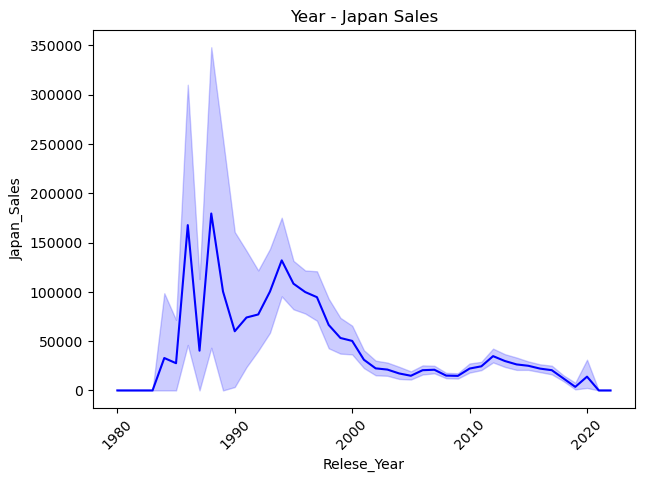

In [33]:
def Plots_by_year(title, sales, color):
    plt.figure(figsize = (7,5), dpi= 100)
    plt.title(title)
    plt.xticks(rotation = 45)
    sns.lineplot(x = 'Relese_Year', 
              y = sales,
              color = color, 
              data = clean_df)
    
Plots_by_year('Year - Japan Sales', 'Japan_Sales', 'blue')

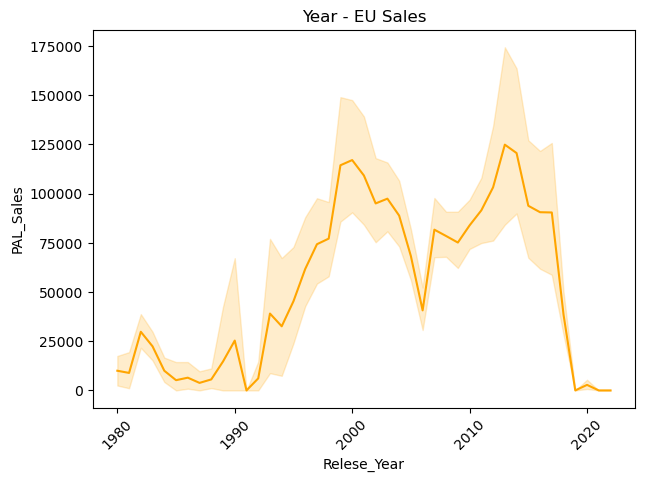

In [34]:
Plots_by_year('Year - EU Sales', 'PAL_Sales', 'orange')

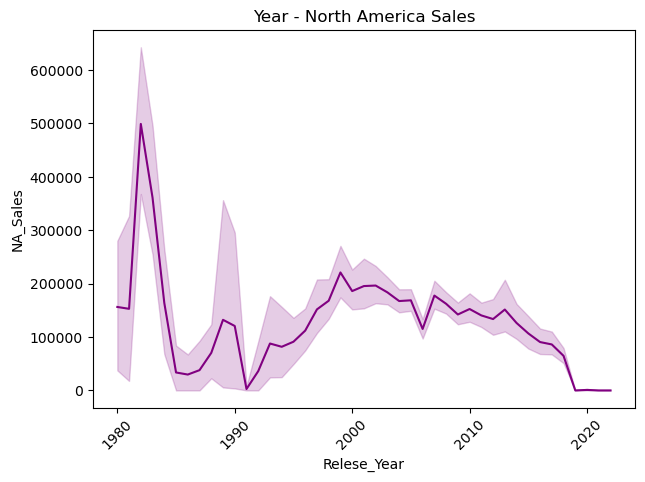

In [35]:
Plots_by_year('Year - North America Sales', 'NA_Sales', 'purple')

**Conclusion:** Sales in Europe peaked in the 2000s and on, while other regions peaked before the 2000s.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Top 5 games with the highest sales volume in each region

-The PS Platform is the popular console in Japan and Europe. However, it is a different story in NA - the leading consoles are XBOX 360 
    
-The dominating Games is 'Call of Duty: Black Ops' in north america and Grand Theft Auto V in Europe

-Sports is one of the leading genres in Japan and Europe, compared to NA which it's Action & Shooter

Frequency of Genre by years

Text(0.5, 1.0, 'Frequency of Genre by years')

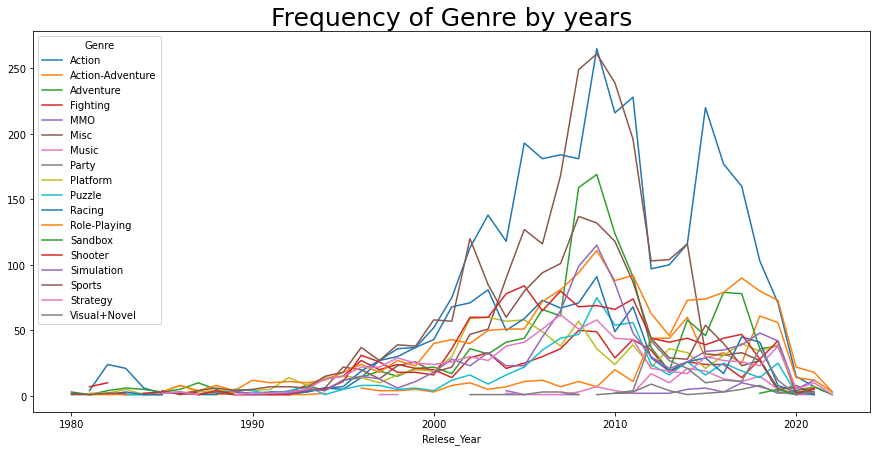

In [36]:
fig, ax = plt.subplots(figsize=(15,7))
clean_df.groupby(['Relese_Year','Genre']).count()['Game'].unstack().plot(ax=ax).set_title('Frequency of Genre by years',fontsize=25)

Games amount of each particular genre by year

Games amount of each particular genre by year

.

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

# Multivariate Analysis

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA Sales, PAL Sales & Japan_Sales by Console

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Grouping North American, Japan, European & Other region sales data per Console

Distribution with percentages of the top 5 consoles by region

In [37]:
explode = [0.1,0.1,0.1,0.1,0.1]
colors = ['lightseagreen', 'mediumpurple', 'aquamarine', 'lawngreen', 'mediumorchid']

def platform_pie(title, sales):
    plt.title(title)
    plt.pie(sales, 
          labels = platforms1,
          wedgeprops=dict(width=0.2),
          shadow = True,
          colors = colors, 
          explode = explode, 
          startangle = 90, 
          autopct='%1.1f%%');

In [38]:
platforms1 = list(clean_df['Console'].value_counts()[:5].to_dict().keys())
sales_cols = ['NA_Sales', 'PAL_Sales', 'Japan_Sales', 'Other_Sales']
global_sales = []
na_sales = []
pal_sales = []
jp_sales = []
other_sales = []
for platform in platforms1:
    global_sales.append(clean_df[clean_df['Console'] == platform]['Total_Sales'].sum())
    na_sales.append(clean_df[clean_df['Console'] == platform]['NA_Sales'].sum())
    pal_sales.append(clean_df[clean_df['Console'] == platform]['PAL_Sales'].sum())
    jp_sales.append(clean_df[clean_df['Console'] == platform]['Japan_Sales'].sum())
    other_sales.append(clean_df[clean_df['Console'] == platform]['Other_Sales'].sum())

NA_Sales       2428490000
PAL_Sales      1389990000
Japan_Sales     474300000
dtype: int64

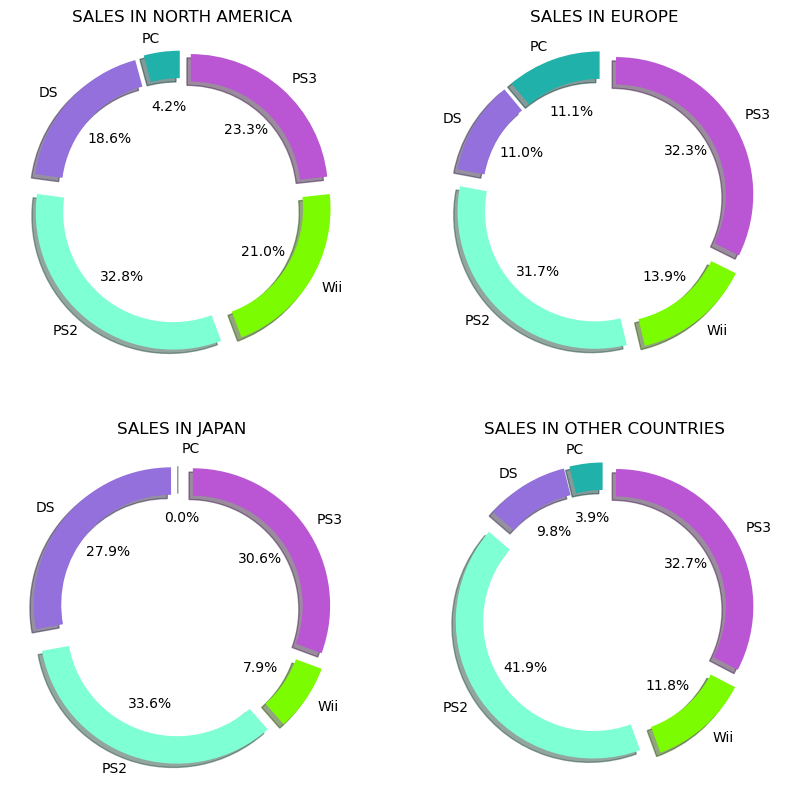

In [39]:
plt.figure(figsize= (10,10), dpi = 100)

plt.subplot(2,2,1)
platform_pie('Sales in North America'.upper(), na_sales)

plt.subplot(2,2,2)
platform_pie('Sales in Europe'.upper(), pal_sales)

plt.subplot(2,2,3)
platform_pie('Sales in Japan'.upper(), jp_sales)

plt.subplot(2,2,4)
platform_pie('Sales in Other countries'.upper(), other_sales)

#Total sales in each region
data = clean_df.groupby('Genre').sum().agg({'NA_Sales':'sum',
                                            'PAL_Sales':'sum',
                                            'Japan_Sales':'sum'})
data

**Conclusion:** PS2 & PS3 Consoles are the most popular platform in global Sales around the world,

 Compared to PC with the fewest sales although they are the console with the most game releases

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA Sales, PAL Sales & Japan_Sales by Genre

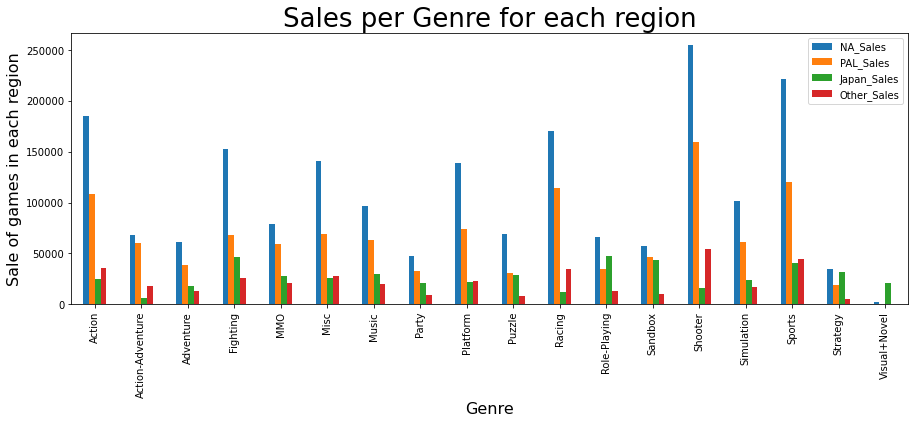

NA_Sales  PAL_Sales  Japan_Sales
Genre                                              
Action            595210000  346840000     79820000
Action-Adventure   36340000   32190000      3120000
Adventure          85870000   53770000     25190000
Fighting          105760000   47120000     32070000
MMO                 3950000    2940000      1390000
Misc              304560000  150220000     56330000
Music              13110000    8640000      4010000
Party               2670000    1810000      1190000
Platform          131160000   69440000     21090000
Puzzle             43250000   19010000     18230000
Racing            196040000  132270000     13820000
Role-Playing      107610000   56330000     77550000
Sandbox              690000     560000       520000
Shooter           315390000  197920000     20020000
Simulation         99460000   60110000     23660000
Sports            356990000  194150000     65400000
Strategy           30020000   16600000     27140000
Visual+Novel         410000      70000      3750000

In [40]:
#Grouping North American, Japan, European & Other region sales data as per Genre

data = clean_df
df3 = data.groupby(['Genre'])
val = df3['NA_Sales','PAL_Sales','Japan_Sales','Other_Sales'].aggregate(np.mean)
val.plot(kind='bar',figsize=(15,5))
plt.xlabel('Genre',fontsize=16)
plt.ylabel('Sale of games in each region',fontsize=16)
plt.title('Sales per Genre for each region',fontsize=26)
plt.show()

Game = clean_df.Game
Genre = clean_df.Genre
Console= clean_df.Console
PAL_Sales=clean_df.PAL_Sales
Japan_Sales=clean_df.Japan_Sales
NA_Sales=clean_df.NA_Sales

#Genre with the highest total sales volume in each region
dfSales3 = {'Game':Game,'Genre': Genre, 
'NA_Sales':NA_Sales,'Console':Console,'PAL_Sales':PAL_Sales,'Japan_Sales':Japan_Sales}
dfSales3 = pd.DataFrame(dfSales3,columns = ['Game','Genre','Console','NA_Sales','PAL_Sales','Japan_Sales'])
dfbygenre = dfSales3.groupby(by=['Genre']).sum()
dfbygenre.head(18)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

NA Sales, PAL Sales & Japan_Sales by Year

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

Grouping sales data of each region yearly and plotting the same

Text(0.5, 1.0, 'Average sales by year for each region ')

<Figure size 2000x2000 with 0 Axes>

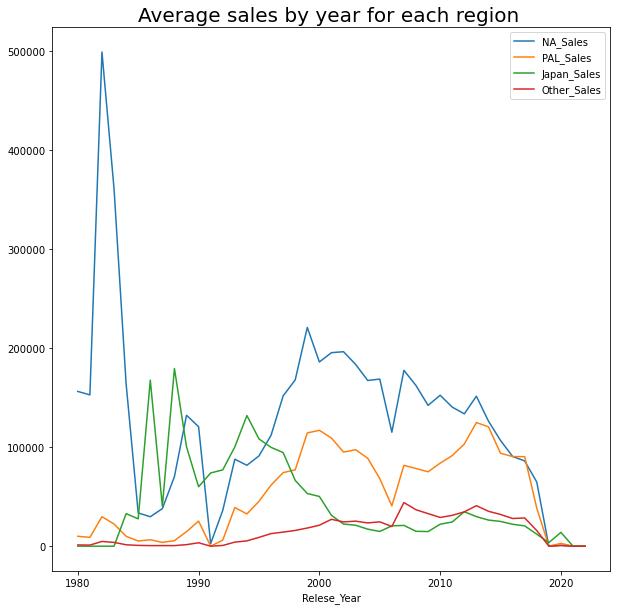

In [41]:
data = clean_df
df1 = data.groupby(['Relese_Year'])
plt.figure(figsize=(10,10), dpi=200)
df1_mean = df1['NA_Sales','PAL_Sales','Japan_Sales','Other_Sales'].aggregate(np.mean)
df1_mean.plot(figsize=(10,10))
plt.title('Average sales by year for each region ', fontsize=20)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [42]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn import preprocessing
clean_df['Genre'] = preprocessing.LabelEncoder().fit_transform(clean_df['Genre'])
clean_df['Console'] = preprocessing.LabelEncoder().fit_transform(clean_df['Console'])
clean_df['Publisher'] = preprocessing.LabelEncoder().fit_transform(clean_df['Publisher'])
clean_df['Developer'] = preprocessing.LabelEncoder().fit_transform(clean_df['Developer'])
clean_df['Developer'] = (clean_df['Developer'] - clean_df['Developer'].min()) / (clean_df['Developer'].max() - clean_df['Developer'].min())
clean_df['Total_Sales'] = (clean_df['Total_Sales'] - clean_df['Total_Sales'].min()) / (clean_df['Total_Sales'].max() - clean_df['Total_Sales'].min())
clean_df['Publisher'] = (clean_df['Publisher'] - clean_df['Publisher'].min()) / (clean_df['Publisher'].max() - clean_df['Publisher'].min())


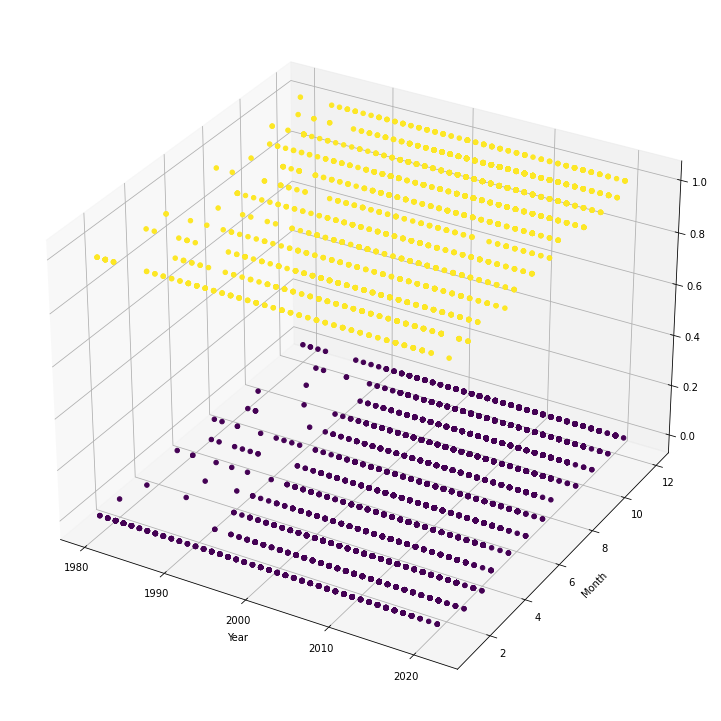

In [43]:
ax = plt.axes(projection = '3d')
x = clean_df.Relese_Year
y = clean_df.Relese_Month
z = clean_df.Hit_Games

plt.xlabel('Year')
plt.ylabel('Month')
ax.scatter3D(x,y,z,c = z,depthshade = False)


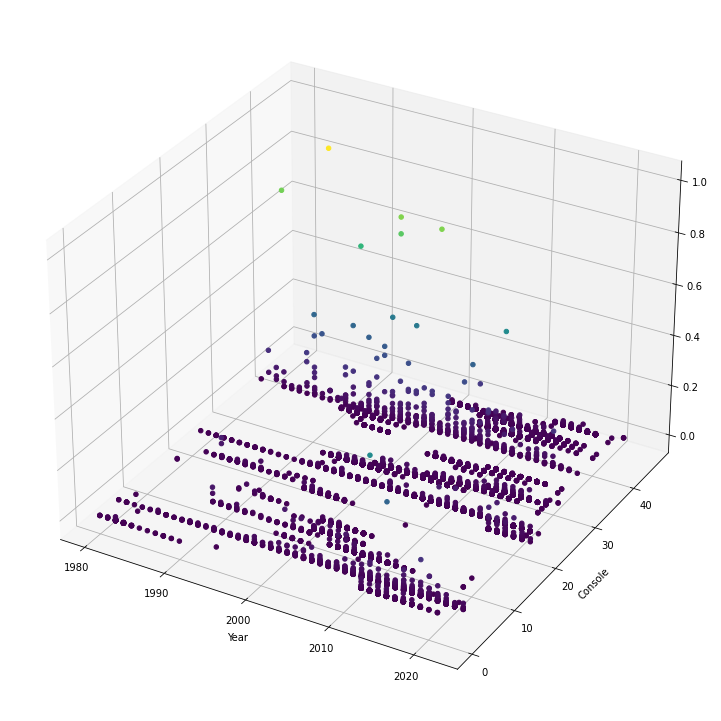

In [44]:
ax = plt.axes(projection = '3d')

x = clean_df.Relese_Year
y = clean_df.Console
z = clean_df.Total_Sales

plt.xlabel('Year')
plt.ylabel('Console')
ax.scatter3D(x,y,z,c = z,depthshade = False)


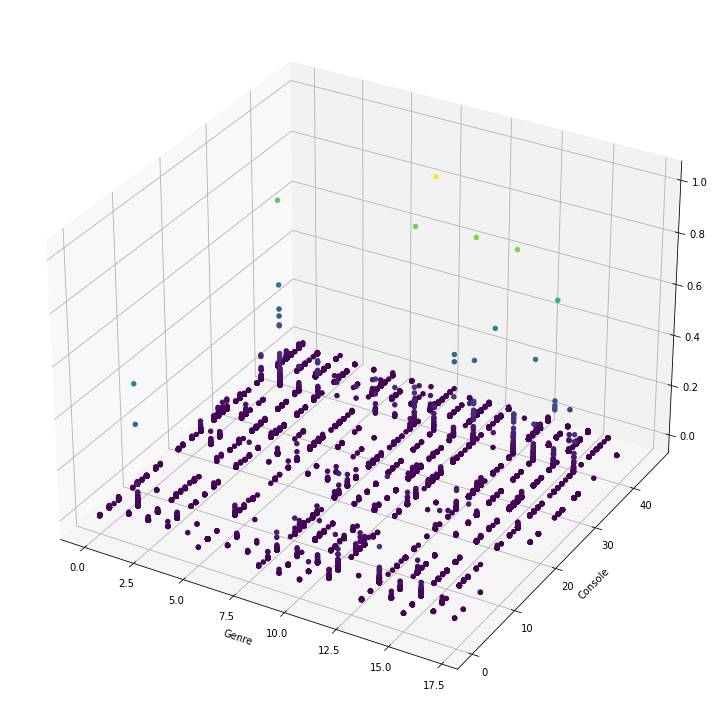

In [45]:
ax = plt.axes(projection = '3d')

x = clean_df.Genre
y = clean_df.Console
z = clean_df.Total_Sales

plt.xlabel('Genre')
plt.ylabel('Console')
ax.scatter3D(x,y,z,c = z,depthshade = False)

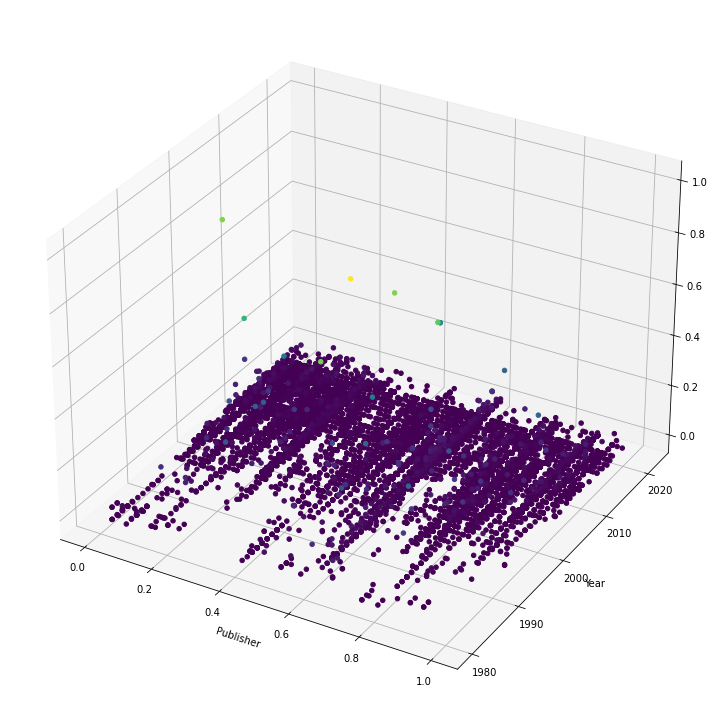

In [46]:
ax = plt.axes(projection = '3d')

x = clean_df.Publisher
y = clean_df.Relese_Year
z = clean_df.Total_Sales

plt.xlabel('Publisher')
plt.ylabel('Year')
ax.scatter3D(x,y,z,c = z,depthshade = False)

.

Hits VS Non-Hits by genre

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

heatmap

<AxesSubplot:>

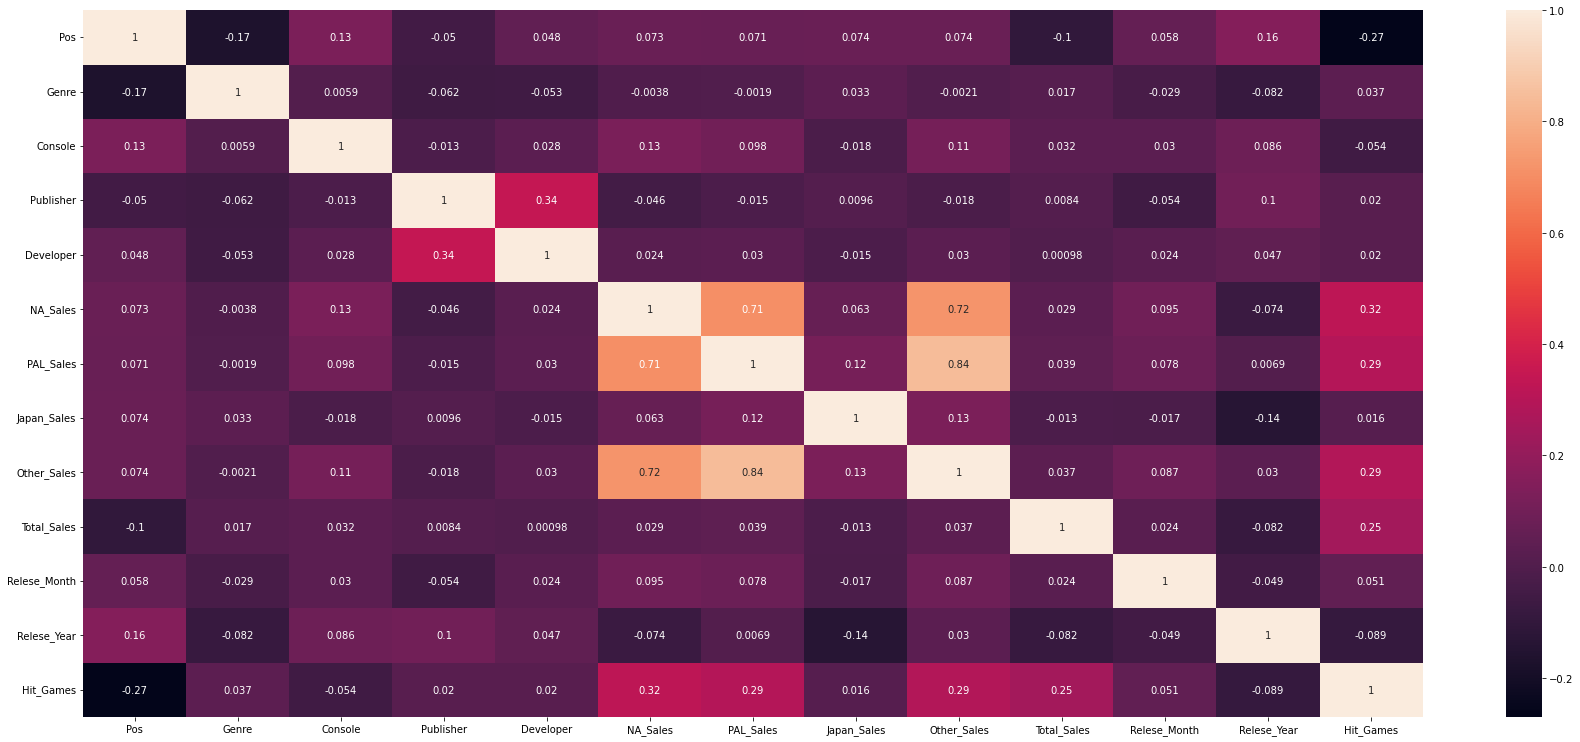

In [47]:
sns.heatmap(clean_df.corr(), annot=True)

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

this function will create a grid of Axes such that each numeric variable in data will by shared across
the y-axes across a single row and the x-axes across a single column.
The diagonal plots are treated differently: 
a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

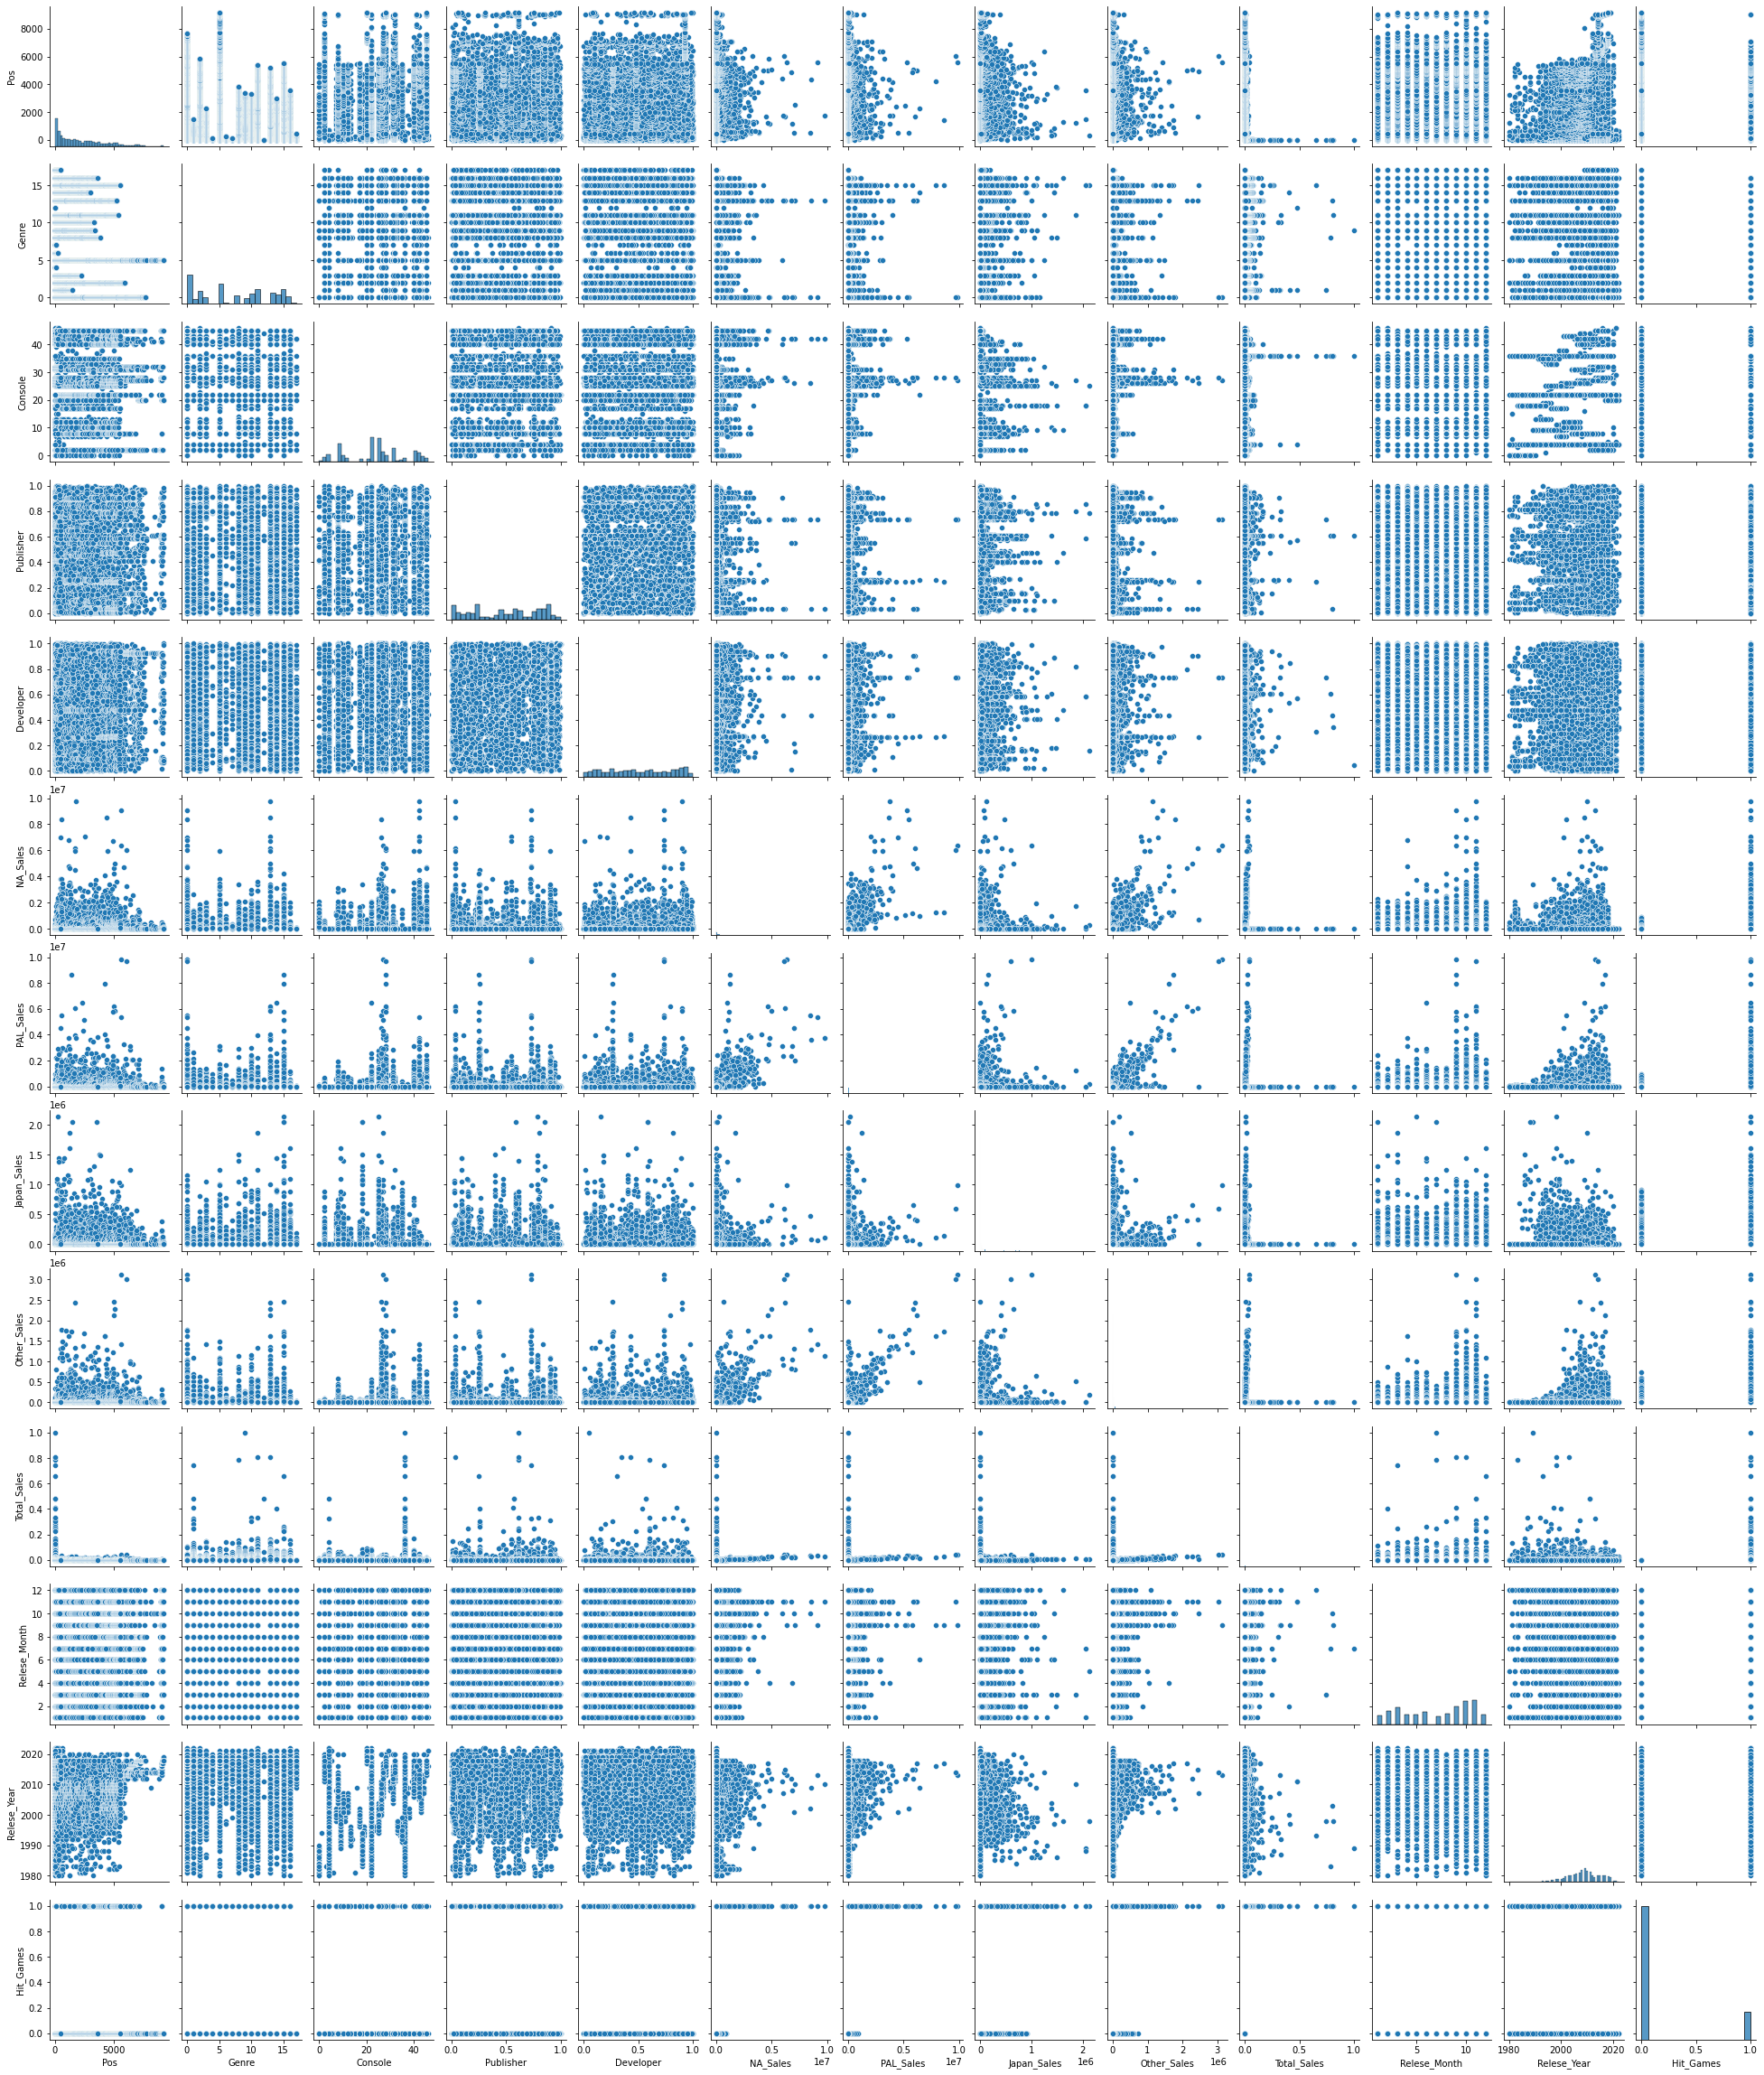

In [48]:
sns.pairplot(clean_df,aspect=.85)

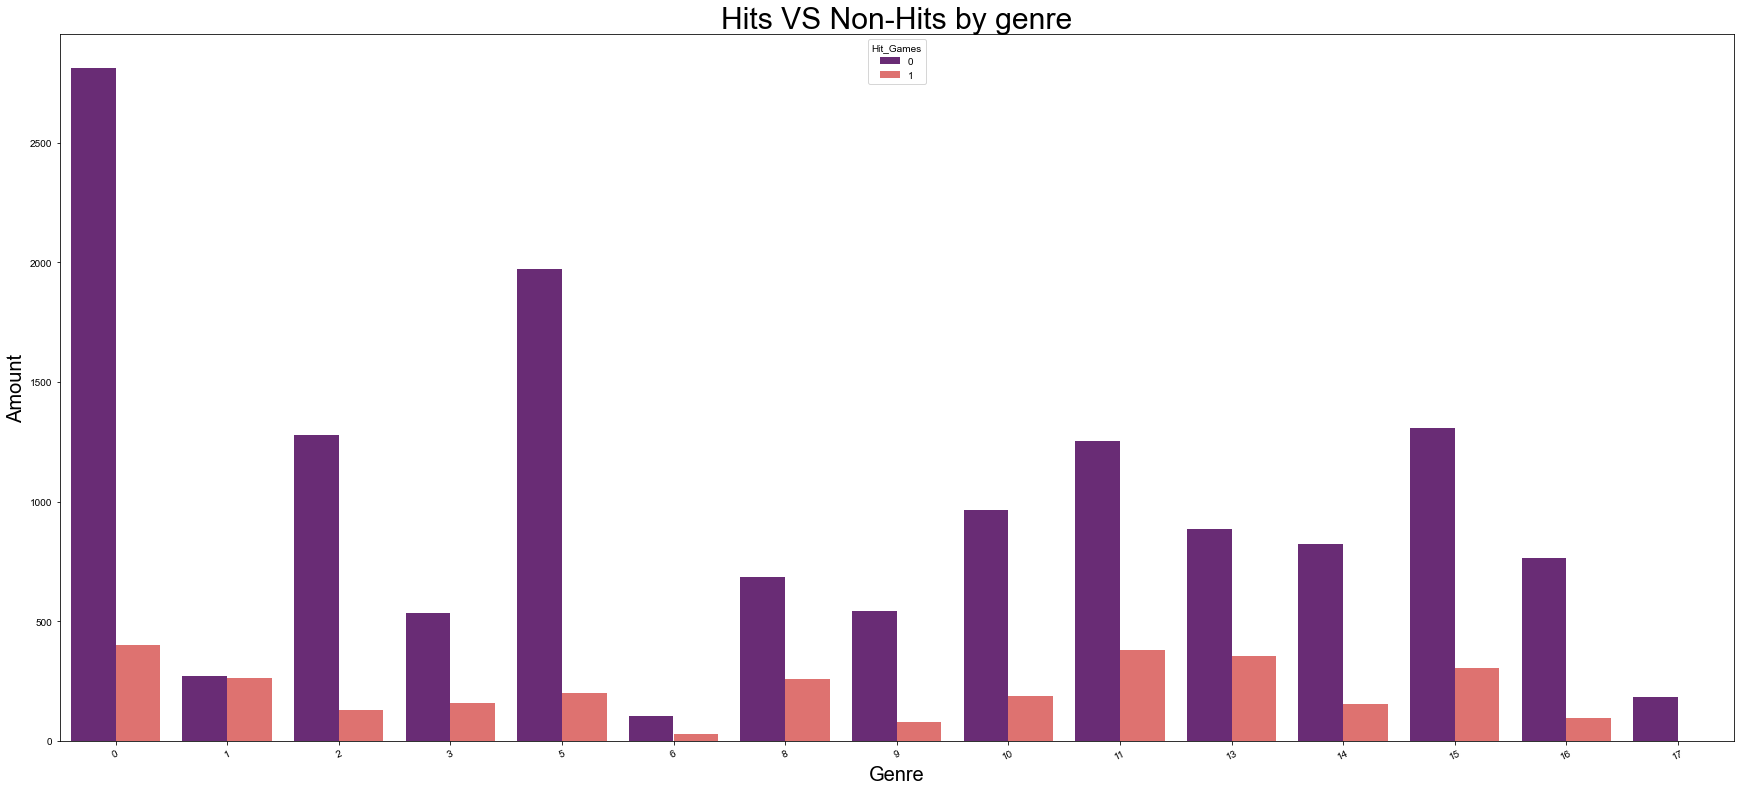

In [49]:
Genre_dist = clean_df[clean_df['Genre'].isin(clean_df.Genre.value_counts().head(15).index.tolist())]
ax = sns.countplot(x='Genre', hue='Hit_Games', data=Genre_dist, palette='magma')
ax.axes.set_title("Hits VS Non-Hits by genre",fontsize=30)
ax.set_xlabel("Genre",fontsize=20)
ax.set_ylabel("Amount",fontsize=20)
sns.set(rc = {'figure.figsize':(20,8)})
ax.set_xticklabels(ax.get_xticklabels(),rotation=25)
plt.show()

# Inferences

Based on our analysis, we can infferd the following conclusions:

PS Platform, published in 1994, made the most sales worldwide. 
This is echoed by both Japan and EU regions. However, it is a different story in NA,
with Call of Duty: Black Ops dominating in north america and Grand Theft Auto V in Europe

50% of top 10 games utilized the PS Platform, making it one of the most successful consoles. 
This could be because of the fact that the PS system was one of the most innovative consoles of its time 


Action, Sports and Role-Playing are the most popular genres with high game titles as well as high global sales made

Nintendo snatched the spot for the Publisher that made the most global sales. 
Unsurprising is the fact that the top sales by developer is Nintendo!

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

**-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------**